# Wing characters measured on wings sampled from PC axes

In [42]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import io as io_
from skimage import io

## 讀檔 Read background removed wing images

In [43]:
# initialize output
wing_characters = dict()
wing_characters_stats = dict()

fw_img_files = [f'./bg_removed/PC_axis12/{f}' for f in os.listdir('bg_removed/PC_axis12') if f.endswith('_FW.png')]
fw_img_files += [f'./bg_removed/PC_axis23/{f}' for f in os.listdir('bg_removed/PC_axis23') if f.endswith('_FW.png')]
fw_img_files += [f'./bg_removed/PC_axis13/{f}' for f in os.listdir('bg_removed/PC_axis13') if f.endswith('_FW.png')]
fw_img_files.sort()

hw_img_files = [f'./bg_removed/PC_axis12/{f}' for f in os.listdir('bg_removed/PC_axis12') if f.endswith('_HW.png')]
hw_img_files += [f'./bg_removed/PC_axis23/{f}' for f in os.listdir('bg_removed/PC_axis23') if f.endswith('_HW.png')]
hw_img_files += [f'./bg_removed/PC_axis13/{f}' for f in os.listdir('bg_removed/PC_axis13') if f.endswith('_HW.png')]
hw_img_files.sort()

#fw_img_files

In [44]:
fw_img_files

['./bg_removed/PC_axis12/xy_-3_-3_FW.png',
 './bg_removed/PC_axis12/xy_-3_0_FW.png',
 './bg_removed/PC_axis12/xy_-3_3_FW.png',
 './bg_removed/PC_axis12/xy_0_-3_FW.png',
 './bg_removed/PC_axis12/xy_0_0_FW.png',
 './bg_removed/PC_axis12/xy_0_3_FW.png',
 './bg_removed/PC_axis12/xy_3_-3_FW.png',
 './bg_removed/PC_axis12/xy_3_0_FW.png',
 './bg_removed/PC_axis12/xy_3_3_FW.png',
 './bg_removed/PC_axis13/xy_-3_-3_FW.png',
 './bg_removed/PC_axis13/xy_-3_0_FW.png',
 './bg_removed/PC_axis13/xy_-3_3_FW.png',
 './bg_removed/PC_axis13/xy_0_-3_FW.png',
 './bg_removed/PC_axis13/xy_0_0_FW.png',
 './bg_removed/PC_axis13/xy_0_3_FW.png',
 './bg_removed/PC_axis13/xy_3_-3_FW.png',
 './bg_removed/PC_axis13/xy_3_0_FW.png',
 './bg_removed/PC_axis13/xy_3_3_FW.png',
 './bg_removed/PC_axis23/xy_-3_-3_FW.png',
 './bg_removed/PC_axis23/xy_-3_0_FW.png',
 './bg_removed/PC_axis23/xy_-3_3_FW.png',
 './bg_removed/PC_axis23/xy_0_-3_FW.png',
 './bg_removed/PC_axis23/xy_0_0_FW.png',
 './bg_removed/PC_axis23/xy_0_3_FW.png',

In [45]:
hw_img_files

['./bg_removed/PC_axis12/xy_-3_-3_HW.png',
 './bg_removed/PC_axis12/xy_-3_0_HW.png',
 './bg_removed/PC_axis12/xy_-3_3_HW.png',
 './bg_removed/PC_axis12/xy_0_-3_HW.png',
 './bg_removed/PC_axis12/xy_0_0_HW.png',
 './bg_removed/PC_axis12/xy_0_3_HW.png',
 './bg_removed/PC_axis12/xy_3_-3_HW.png',
 './bg_removed/PC_axis12/xy_3_0_HW.png',
 './bg_removed/PC_axis12/xy_3_3_HW.png',
 './bg_removed/PC_axis13/xy_-3_-3_HW.png',
 './bg_removed/PC_axis13/xy_-3_0_HW.png',
 './bg_removed/PC_axis13/xy_-3_3_HW.png',
 './bg_removed/PC_axis13/xy_0_-3_HW.png',
 './bg_removed/PC_axis13/xy_0_0_HW.png',
 './bg_removed/PC_axis13/xy_0_3_HW.png',
 './bg_removed/PC_axis13/xy_3_-3_HW.png',
 './bg_removed/PC_axis13/xy_3_0_HW.png',
 './bg_removed/PC_axis13/xy_3_3_HW.png',
 './bg_removed/PC_axis23/xy_-3_-3_HW.png',
 './bg_removed/PC_axis23/xy_-3_0_HW.png',
 './bg_removed/PC_axis23/xy_-3_3_HW.png',
 './bg_removed/PC_axis23/xy_0_-3_HW.png',
 './bg_removed/PC_axis23/xy_0_0_HW.png',
 './bg_removed/PC_axis23/xy_0_3_HW.png',

In [46]:
# fw_img_files = [f'./PC_axis12/{f}' for f in os.listdir('PC_axis12') if f.endswith('_FW.png')]
# fw_img_files += [f'./PC_axis23/{f}' for f in os.listdir('PC_axis23') if f.endswith('_FW.png')]
# fw_img_files += [f'./PC_axis13/{f}' for f in os.listdir('PC_axis13') if f.endswith('_FW.png')]

# hw_img_files = [f'./PC_axis12/{f}' for f in os.listdir('PC_axis12') if f.endswith('_HW.png')]
# hw_img_files += [f'./PC_axis23/{f}' for f in os.listdir('PC_axis23') if f.endswith('_HW.png')]
# hw_img_files += [f'./PC_axis13/{f}' for f in os.listdir('PC_axis13') if f.endswith('_HW.png')]

# fw_img_files

In [47]:
# 去背影像二值化
def binarify(img, k=(1,1), iterations=5):
    #img_bg_idx = np.where((img[:,:,0]==0) & (img[:,:,1]==0) & (img[:,:,2]==0))
    img_bg_idx = np.where(img[:,:,3]==0)
    binary = np.ones(img.shape[:2], dtype=np.uint8)
    binary[img_bg_idx] = 0
    # 清掉沒去背乾淨的渣渣
    if iterations >= 1:
        binary = cv2.erode(binary, k, iterations=iterations)
        #binary = cv2.dilate(binary, k, iterations=iterations)
    return binary

# 從二值影像產出 bounding box
def bbox_crop(binary):
    cntrs, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    bbox_x, bbox_y, bbox_w, bbox_h = cv2.boundingRect(cntrs[0])
    return binary[bbox_y:bbox_y+bbox_h, bbox_x:bbox_x+bbox_w], [bbox_x, bbox_y, bbox_x+bbox_w, bbox_y+bbox_h]

# 取出前景所在的 pixel y, x 坐標值
def take_fg_pixels(img, img_binary):
    y_, x_ = np.where(img_binary==1)
    return img[y_, x_], (y_, x_)

# 取出亮度值的指定百分位數
def hsv_vp(per, hsvs):
    return np.quantile(np.concatenate(hsvs)[:,2], per/100)

# 計算 Convex Hull 面積
def PolyArea2D(pts):
    lines = np.hstack([pts,np.roll(pts,-1,axis=0)])
    area = 0.5*abs(sum(x1*y2-x2*y1 for x1,y1,x2,y2 in lines))
    return area

## 稍微測試一下 Some tests

In [48]:
test_wid = 9
fw_img_files[test_wid]

'./bg_removed/PC_axis13/xy_-3_-3_FW.png'

In [49]:
fw_img = cv2.imread(f'{fw_img_files[test_wid]}', cv2.IMREAD_UNCHANGED)
hw_img = cv2.imread(f'{fw_img_files[test_wid]}'.replace('FW', 'HW'), cv2.IMREAD_UNCHANGED)

In [50]:
fw_binary = binarify(fw_img)
fw_cropped, _ = bbox_crop(fw_binary)
# fw_rgb = take_fg_pixels(fw_img)
# fw_gray = take_fg_pixels(cv2.cvtColor(fw_img, cv2.COLOR_BGR2GRAY))

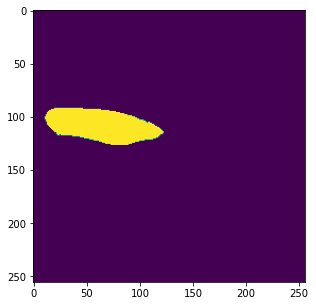

In [51]:
plt.rcParams['figure.figsize'] = [5, 5]
#plt.imshow(fw_img * fw_binary.reshape(*fw_binary.shape, 1))
plt.imshow(fw_binary)

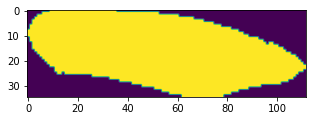

In [52]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.imshow(fw_cropped)

## 各種傳統特徵量化 Some quantifications

In [53]:
# 指定前後翅，前翅 fw, 後翅 hw, 兩者一起 both。分析時就只分別看前後翅了
# Assign target wing
target_wings = 'hw'
# target_wings = 'hw'
# target_wings = 'both'

In [54]:
if target_wings == 'fw':
    target_img_files = fw_img_files
elif target_wings == 'hw':
    target_img_files = hw_img_files
elif target_wings == 'both':
    target_img_files = fw_img_files + hw_img_files
else:
    raise ('Wrong wing part.')

### 亮度與顏色變異 Brightness, color variations

In [55]:
# 前景的 RGB 值
rgbs = []
# 前景的 HSV 值
hsvs = []

grays = []

# 檔名中拆出的 PC1 軸值
pc1v = []
# 檔名中拆出的 PC2 軸值
pc2v = []
# 檔名中拆出的 PC3 軸值
pc3v = []
# 前景所在的 y, x 坐標值
img_fg_idxs = []

pc_plot_groups = []

bboxes = []
w_binarys = []

for w_ in target_img_files:
    w_img = cv2.imread(f'{w_}', cv2.IMREAD_UNCHANGED)
    w_binary = binarify(w_img)
    w_binarys.append(w_binary)

    w_img = cv2.cvtColor(w_img, cv2.COLOR_BGR2RGB)
    w_img_gray = cv2.cvtColor(w_img, cv2.COLOR_RGB2GRAY)
    # w_img = cv2.normalize(w_img.astype(float)/255, None, 1, 0, cv2.NORM_MINMAX)
    #w_img = (w_img * 255).astype(np.uint8)
    if w_.split('/')[2].endswith('12'):
        pc_plot_groups.append('12')
        pc1v.append(int(w_.split('_')[3]))
        pc2v.append(int(w_.split('_')[4]))
        pc3v.append(0)
    elif w_.split('/')[2].endswith('23'):
        pc_plot_groups.append('23')
        pc1v.append(0)
        pc2v.append(int(w_.split('_')[3]))
        pc3v.append(int(w_.split('_')[4]))
    elif w_.split('/')[2].endswith('13'):
        pc_plot_groups.append('13')
        pc1v.append(int(w_.split('_')[3]))
        pc2v.append(0)
        pc3v.append(int(w_.split('_')[4]))

    w_img_hsv = cv2.cvtColor(w_img, cv2.COLOR_RGB2HSV)
    w_cropped, bbox = bbox_crop(w_binary)
    bboxes.append(bbox)
    
    w_rgb, img_fg_idx = take_fg_pixels(w_img, w_binary)
    img_fg_idxs.append(img_fg_idx)
    rgbs.append(w_rgb)
    
    w_gray, _ = take_fg_pixels(w_img_gray, w_binary)
    grays.append(w_gray)
    
    w_hsv, _ = take_fg_pixels(w_img_hsv, w_binary)
    hsvs.append(w_hsv)

In [56]:
query_axis = pd.DataFrame(dict(pc_plot_group=pc_plot_groups, pc1=pc1v, pc2=pc2v, pc3=pc3v))

In [57]:
# 翅膀暗區比例 (暗於所有翅膀 pixels 點的 q .25 佔翅膀的比例)
dark_area = np.array([((w_<hsv_vp(25, hsvs)).sum()+0) / len(w_) for w_ in hsvs])
# 翅膀亮區比例 (亮於所有翅膀 pixels 點的 q .25 佔翅膀的比例)
light_area = np.array([((w_>hsv_vp(75, hsvs)).sum()+0) / len(w_) for w_ in hsvs])
# 翅膀平均色調(無意義)、平均飽和度、平均亮度
hsv_mean = np.array([w_.mean(axis=0) for w_ in hsvs])
# 亮區與暗區的比例
lit2dar = light_area / dark_area
# 翅膀色調(無意義)、飽和度、亮度標準差
hsv_stds = np.array([np.std(w_, axis=0) for w_ in hsvs])

gray_mean = np.array([w_.mean(axis=0) for w_ in grays])

In [58]:
gray_mean

array([128.41526045, 149.4       , 160.15806686, 136.64348555,
       152.91739824, 114.55085052, 120.54526167, 122.44961416,
       119.40765883, 169.27659574, 154.74322289, 121.83314154,
       168.33349669, 148.33689642, 107.77753896, 141.73996176,
       117.77967213,  90.41387735, 157.42361111, 133.37114198,
        82.42257818, 167.78121927, 148.78816794, 107.59010152,
       139.99635369, 110.10779407,  97.86070168])

In [59]:
# RGB 各自的標準差 (std)
rgb_stds = np.array([np.std(w_, axis=0) for w_ in rgbs])
# RGB 各自的平均值 (mean)
rgb_means = np.array([np.mean(w_, axis=0) for w_ in rgbs])

### 色彩分群(找出獨特的色塊群) Color clustering for unique patches

In [60]:
from sklearn.cluster import OPTICS, DBSCAN, KMeans, Birch
cls = Birch(n_clusters=None, threshold=16)
#cls = Birch(n_clusters=32)#, threshold=16)
#cls = OPTICS(min_samples=220, max_eps=16)
color_groups = cls.fit_predict(np.concatenate(rgbs).astype(float))

In [61]:
idx_counter = 0
wing_color_groups = []
distinct_colors = []
for color in rgbs:
    wing_color_group = color_groups[idx_counter:idx_counter+color.shape[0]]
    wing_color_groups.append(wing_color_group)
    distinct_colors.append(np.unique(wing_color_group).shape[0])
    idx_counter += color.shape[0]

In [62]:
color_evenness = []
for wing_i, wing_color_group_ in enumerate(wing_color_groups):
    distinct_wing_colors_, color_counts_ = np.unique(wing_color_group_, return_counts=True)
    H = -np.sum([(p/len(wing_color_group_)) * np.log(p/len(wing_color_group_)) for p in color_counts_])
    J = H / np.log(len(color_counts_))
    color_evenness.append(J)

/home/ess/anaconda3/envs/bury_beetles/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ess/anaconda3/envs/bury_beetles/lib/python3.7/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


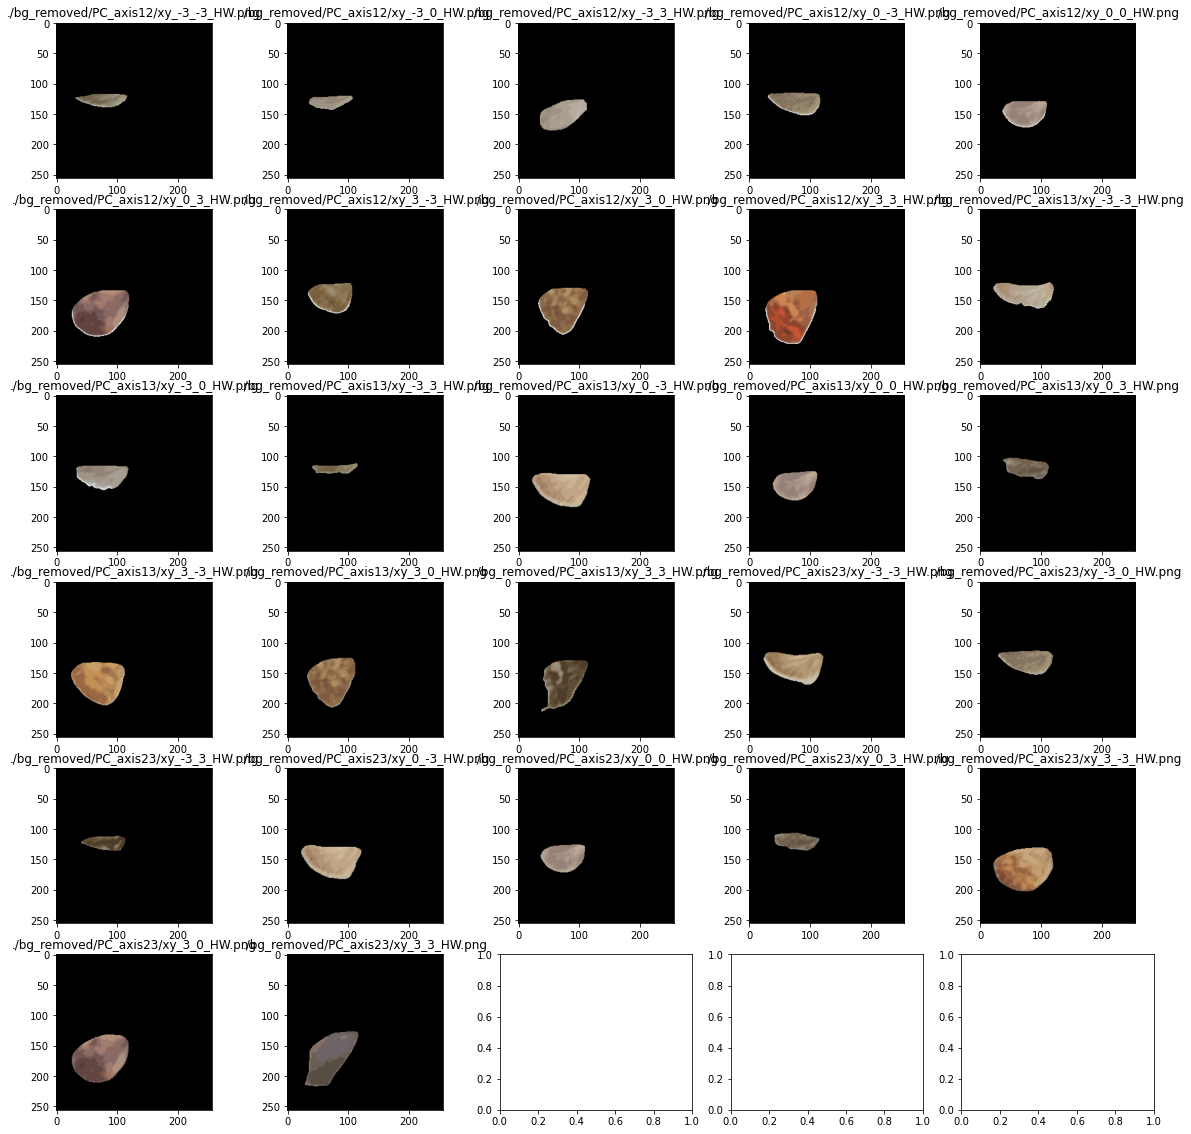

In [63]:
plt.rcParams['figure.figsize'] = [20, 20]
fig, axes = plt.subplots(6,5)
distinct_color_canvases = []
for i, img_fg_idx in enumerate(img_fg_idxs):
    #print(target_img_files[i])
    img_color_groups = wing_color_groups[i]
    #canvas = np.zeros((max(img_fg_idx[0])+1, max(img_fg_idx[1])+1, 3), dtype=np.uint8)
    canvas = np.zeros([256, 256, 3], dtype=np.uint8)
    #print(max(img_color_groups)+1)
    for c in range(0,max(img_color_groups)+1):
        try:
            c_mean = np.mean(rgbs[i][img_color_groups==c], axis=0)
            canvas[img_fg_idx[0][img_color_groups==c], img_fg_idx[1][img_color_groups==c]] = c_mean.astype(np.uint8)
        except:
            print(f'Missing color group {c} for image {target_img_files[i]}.')
        #canvas[img_fg_idx[0][img_color_groups==c], img_fg_idx[1][img_color_groups==c]] = rgbs[i][img_color_groups==c]
    distinct_color_canvases.append(canvas.copy())
    axes[int(i//5), i%5].imshow(distinct_color_canvases[-1])
    axes[int(i//5), i%5].set_title(f'{target_img_files[i]}')

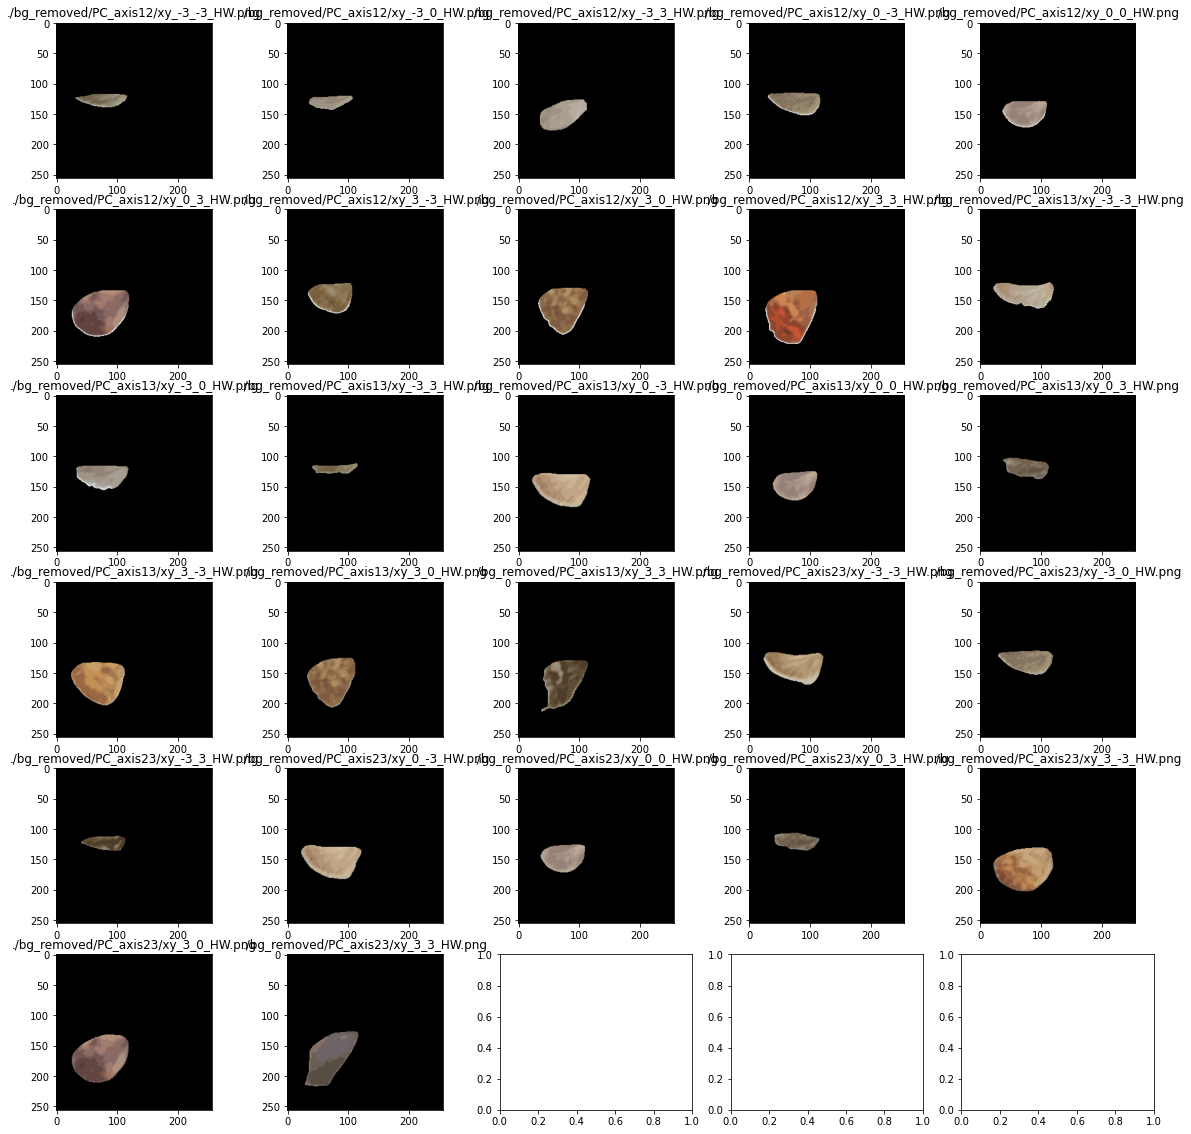

In [64]:
plt.rcParams['figure.figsize'] = [20, 20]
fig, axes = plt.subplots(6,5)
xflip_distinct_color_canvases = []
for i, img_fg_idx in enumerate(img_fg_idxs):
    #print(target_img_files[i])
    img_color_groups = wing_color_groups[i]
    #canvas = np.zeros((max(img_fg_idx[0])+1, max(img_fg_idx[1])+1, 3), dtype=np.uint8)
    canvas = np.zeros([256, 256, 3], dtype=np.uint8)
    #print(max(img_color_groups)+1)
    for c in range(0,max(img_color_groups)+1):
        try:
            c_mean = np.mean(rgbs[i][img_color_groups==c], axis=0)
            canvas[img_fg_idx[0][img_color_groups==c], img_fg_idx[1][img_color_groups==c]] = c_mean.astype(np.uint8)
        except:
            print(f'Missing color group {c} for image {target_img_files[i]}.')
        #canvas[img_fg_idx[0][img_color_groups==c], img_fg_idx[1][img_color_groups==c]] = rgbs[i][img_color_groups==c]
    xflip_distinct_color_canvases.append(canvas.copy())
    axes[int(i//5), i%5].imshow(xflip_distinct_color_canvases[-1])
    axes[int(i//5), i%5].set_title(f'{target_img_files[i]}')

In [65]:
# plt.rcParams['figure.figsize'] = [20, 20]
# fig, axes = plt.subplots(6,5)

# hflip_distinct_color_canvases = []
# for i, img_fg_idx in enumerate(img_fg_idxs):
#     #print(target_img_files[i])
#     img_color_groups = wing_color_groups[i]
#     #canvas = np.zeros((max(img_fg_idx[0])+1, max(img_fg_idx[1])+1, 3), dtype=np.uint8)
#     canvas = np.zeros([256, 256, 3], dtype=np.uint8)
#     #print(max(img_color_groups)+1)
#     for c in range(0,max(img_color_groups)+1):
#         try:
#             c_mean = np.mean(rgbs[i][img_color_groups==c], axis=0)
#             canvas[img_fg_idx[0][img_color_groups==c], img_fg_idx[1][img_color_groups==c]] = c_mean.astype(np.uint8)
#         except:
#             print(f'Missing color group {c} for image {target_img_files[i]}.')
#         #canvas[img_fg_idx[0][img_color_groups==c], img_fg_idx[1][img_color_groups==c]] = rgbs[i][img_color_groups==c]
#     hflip_distinct_color_canvases.append(canvas.copy())
#     axes[int(i//5), i%5].imshow(hflip_distinct_color_canvases[-1])
#     axes[int(i//5), i%5].set_title(f'{target_img_files[i]}')

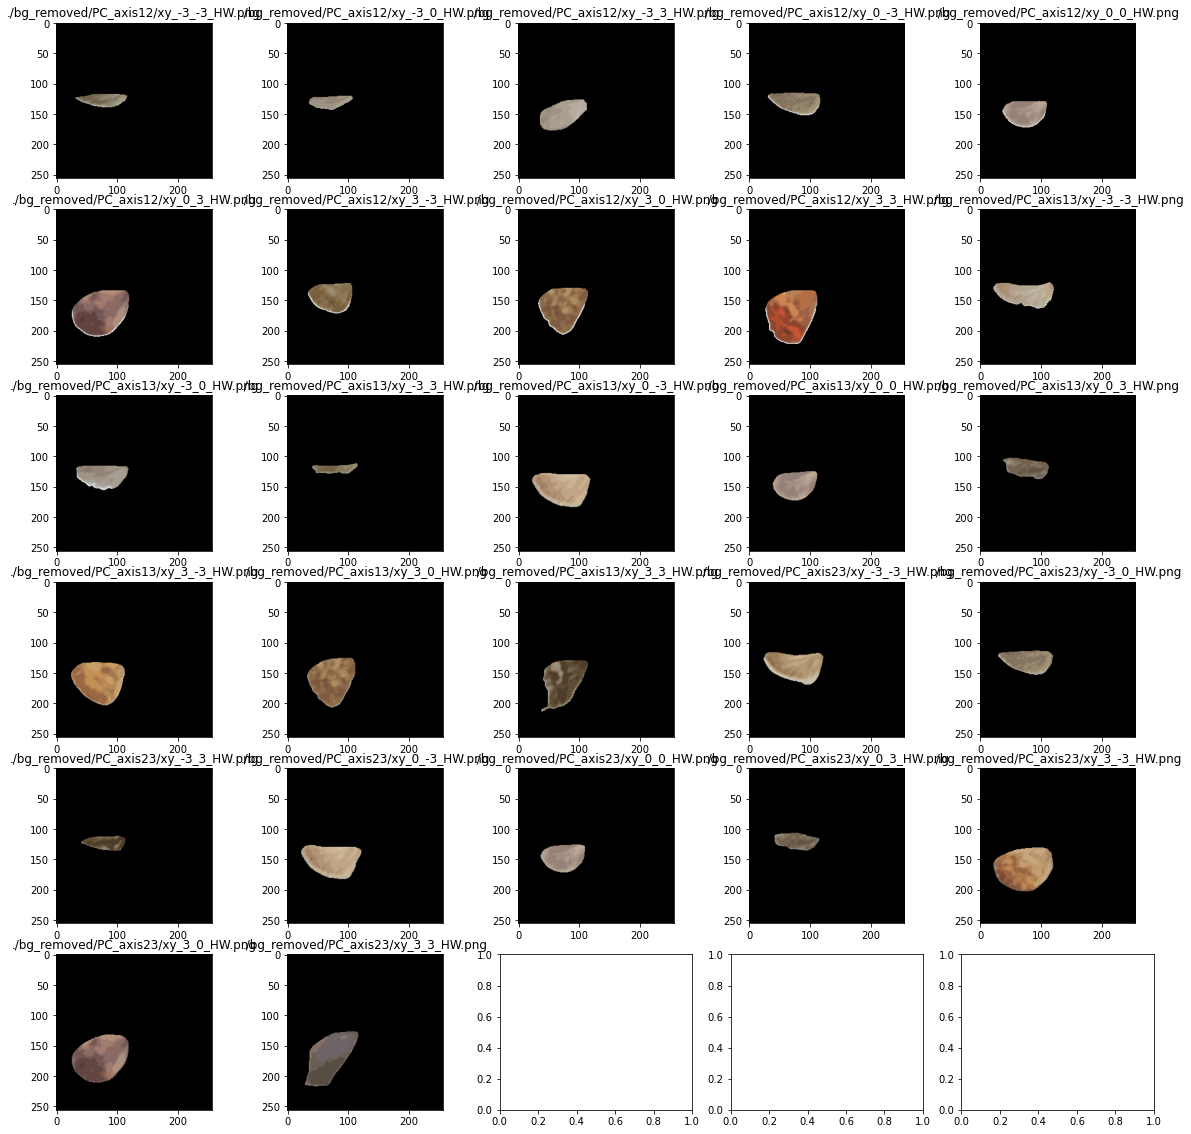

In [66]:
plt.rcParams['figure.figsize'] = [20, 20]
fig, axes = plt.subplots(6,5)
for i, img_fg_idx in enumerate(img_fg_idxs):
    #print(target_img_files[i])
    img_color_groups = wing_color_groups[i]
    #canvas = np.zeros((max(img_fg_idx[0])+1, max(img_fg_idx[1])+1, 3), dtype=np.uint8)
    #canvas = np.zeros([256, 256, 3], dtype=np.uint8)
    canvas = xflip_distinct_color_canvases[i]
    #print(max(img_color_groups)+1)
    for c in range(0,max(img_color_groups)+1):
        try:
            c_mean = np.mean(rgbs[i][img_color_groups==c], axis=0)
            canvas[img_fg_idx[0][img_color_groups==c], img_fg_idx[1][img_color_groups==c]] = c_mean.astype(np.uint8)
        except:
            print(f'Missing color group {c} for image {target_img_files[i]}.')
        #canvas[img_fg_idx[0][img_color_groups==c], img_fg_idx[1][img_color_groups==c]] = rgbs[i][img_color_groups==c]
    xflip_distinct_color_canvases[i] = canvas.copy()
    axes[int(i//5), i%5].imshow(xflip_distinct_color_canvases[i])
    axes[int(i//5), i%5].set_title(f'{target_img_files[i]}')

### 找出翅膀上最獨特的部位 Calculate Pattern Distinctiveness-Distance Index (PDDI)

In [67]:
#### no plotting
from sklearn.metrics import pairwise_distances

def hflipMinMaxScaler(v):
    return (v.max() - v) / (v.max() - v.min())

def qmean(group_dt, var, q):
    qv = np.quantile(group_dt[var], q)
    vals_ = group_dt[group_dt[var] >= qv][var]
    return vals_.mean()

feat_on_x_edge_indices = []
feat_on_y_edge_indices = []

for wing_i in range(len(rgbs)):
#for wing_i in range(3):
    
    print(wing_i, end='\r')
    
    # 計算前景(翅膀) RGB 值中，任兩點的 歐式距離
    pwd_rgb = pairwise_distances(rgbs[wing_i])
    
    # 轉回影像的 xy 平面
#     xy_pwds = []
#     for i_ in range(len(img_fg_idxs[wing_i][0])):
#         for j_ in range(len(img_fg_idxs[wing_i][0])):
#             xy_pwds.append((img_fg_idxs[wing_i][1][i_], img_fg_idxs[wing_i][0][i_], pwd_rgb[i_][j_]))

#     xy_pwds_df = pd.DataFrame(xy_pwds, columns=['x','y','pwd'])

    xy_pwds_df = pd.DataFrame(np.repeat(np.array([img_fg_idxs[wing_i][1], img_fg_idxs[wing_i][0]]).T, img_fg_idxs[wing_i][1].shape[0], axis=0), columns=['x', 'y'])
    xy_pwds_df['pwd'] = pwd_rgb.reshape(-1)
    
    
    # 算出每個點到任意其他點的 RGB 歐式距離平均，這個值愈大代表該部位顏色愈獨特
    xy_pwds_mean_df = xy_pwds_df.groupby(['x', 'y']).mean().reset_index()
    xy_pwds_mean_df['pwd_valid'] = xy_pwds_mean_df['pwd'].values
    
    # 抑制 q .95 以上的值，減緩修圖時造成的邊緣雜訊
    xy_pwds_mean_df.loc[xy_pwds_mean_df.pwd > xy_pwds_mean_df.pwd.quantile(.95), 'pwd_valid'] = xy_pwds_mean_df.pwd.quantile(.95)
    
    # 對獨特性做 min max scaling 標準化
    xy_pwds_mean_df['pwd_norm'] = (xy_pwds_mean_df['pwd_valid'] - xy_pwds_mean_df['pwd_valid'].min()) / (xy_pwds_mean_df['pwd_valid'].max() - xy_pwds_mean_df['pwd_valid'].min())
    # 改成用理論 max 值標準化，不然那些平平無奇的翅膀也算起來也可能變得很 diverse
    # xy_pwds_mean_df['pwd_norm'] = xy_pwds_mean_df['pwd_valid'] / np.sqrt(3 * 255**2)
    # xy_pwds_mean_df['pwd_norm'] = xy_pwds_mean_df['pwd_valid'] / xy_pwds_mean_df['pwd_valid'].min()

    # 水平翻轉翅膀，讓 x 坐標與翅基-翅尖方向一致，並且將 x 值做 min max scaling
    xy_pwds_mean_df['x_norm'] = (xy_pwds_mean_df.x.max() - xy_pwds_mean_df.x) / (xy_pwds_mean_df.x.max() - xy_pwds_mean_df.x.min())
    # 將 y 值做 min max scaling
    # xy_pwds_mean_df['y_norm'] = (xy_pwds_mean_df.y - xy_pwds_mean_df.y.min()) / (xy_pwds_mean_df.y.max() - xy_pwds_mean_df.y.min())
    # 將色彩的獨特性與距離翅基的距離加權
    # xy_pwds_mean_df['pwd_x_weighted'] = xy_pwds_mean_df.x_norm * xy_pwds_mean_df.pwd_norm
    # xy_pwds_mean_df['pwd_y_weighted'] = xy_pwds_mean_df.y_norm * xy_pwds_mean_df.pwd_norm

    # 參考 x 對獨特性加權值做平均，用來看獨特色彩主要分部的 x 位置
    # feat_on_x_edge_indice = xy_pwds_mean_df.groupby('x').mean().pwd_x_weighted.values.mean()
    # 改成用 pwd groupby x 的前 P % 值做平均比較有代表性
    pixel_column_means = xy_pwds_mean_df.groupby('x_norm').apply(qmean, 'pwd_norm', .5)
    # pixel_column_means = xy_pwds_mean_df.groupby('x_norm').mean()
    
    # distinctiveness_prN = pixel_column_means[pixel_column_means >= 0.7]
    loc_prN = pixel_column_means.index.values[pixel_column_means.values >= np.quantile(pixel_column_means.values, .5)]
    # distinctiveness_x_weighted = pixel_column_means.index.values * pixel_column_means.pwd_norm.values
    feat_on_x_edge_indice = loc_prN.mean() / loc_prN.var() #distinctiveness_x_weighted.mean()# / distinctiveness_x_weighted.var()
    # feat_on_x_edge_indice = pixel_column_means.mean()
    feat_on_x_edge_indices.append(feat_on_x_edge_indice)
    
    # plt.rcParams['figure.figsize'] = [10, 1]
    # cmap_ = plt.get_cmap('jet')
    # pwd_norm_conv_ = np.convolve(pixel_column_means.values, np.ones(1), mode='same')
    # pwd_norm_conv_ = pwd_norm_conv_ / pwd_norm_conv_.max()
    # pwd_norm_colors_ = np.array([list(cmap_(c)[:3]) for c in pwd_norm_conv_])
    # pwd_norm_colors_belt = np.repeat(pwd_norm_colors_.reshape(1, -1, 3), 20, axis=0)
    # plt.figure()
    # plt.imshow(pwd_norm_colors_belt)


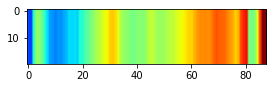

In [68]:
plt.rcParams['figure.figsize'] = [10, 1]
cmap_ = plt.get_cmap('jet')
pwd_norm_conv_ = np.convolve(pixel_column_means.values, np.ones(1), mode='same')
pwd_norm_conv_ = pwd_norm_conv_ / pwd_norm_conv_.max()
pwd_norm_colors_ = np.array([list(cmap_(c)[:3]) for c in pwd_norm_conv_])
pwd_norm_colors_belt = np.repeat(pwd_norm_colors_.reshape(1, -1, 3), 20, axis=0)
plt.imshow(pwd_norm_colors_belt)

In [69]:
# from sklearn.metrics import pairwise_distances

# # plt.rcParams['figure.figsize'] = [20, 24]
# # fig, axes = plt.subplots(6,5)
# plt.rcParams['figure.figsize'] = [12, 12]
# # # wing_fig_, wing_axes_ = plt.subplots(27, 3)

# # canvas_pcgroups = [
# #     plt.subplots(3, 3),
# #     plt.subplots(3, 3),
# #     plt.subplots(3, 3)
# # ]

# feat_on_x_edge_indices = []
# feat_on_y_edge_indices = []

# for wing_i in range(len(rgbs)):
# #for wing_i in range(3):
    
#     print(wing_i, end='\r')
    
#     # 計算前景(翅膀) RGB 值中，任兩點的 歐式距離
#     pwd_rgb = pairwise_distances(rgbs[wing_i])
    
#     # 轉回影像的 xy 平面
#     xy_pwds = []
#     for i_ in range(len(img_fg_idxs[wing_i][0])):
#         for j_ in range(len(img_fg_idxs[wing_i][0])):
#             xy_pwds.append((img_fg_idxs[wing_i][1][i_], img_fg_idxs[wing_i][0][i_], pwd_rgb[i_][j_]))

#     xy_pwds_df = pd.DataFrame(xy_pwds, columns=['x','y','pwd'])
    
#     # 算出每個點到任意其他點的 RGB 歐式距離平均，這個值愈大代表該部位顏色愈獨特
#     xy_pwds_mean_df = xy_pwds_df.groupby(['x', 'y']).mean().reset_index()
#     xy_pwds_mean_df['pwd_valid'] = xy_pwds_mean_df['pwd'].values
    
#     # 抑制 q .95 以上的值，減緩修圖時造成的邊緣雜訊
#     xy_pwds_mean_df.loc[xy_pwds_mean_df.pwd > xy_pwds_mean_df.pwd.quantile(.95), 'pwd_valid'] = xy_pwds_mean_df.pwd.quantile(.95)
    
#     # 對獨特性做 min max scaling 標準化
#     xy_pwds_mean_df['pwd_norm'] = (xy_pwds_mean_df['pwd_valid'] - xy_pwds_mean_df['pwd_valid'].min()) / (xy_pwds_mean_df['pwd_valid'].max() - xy_pwds_mean_df['pwd_valid'].min())

#     # 水平翻轉翅膀，讓 x 坐標與翅基-翅尖方向一致，並且將 x 值做 min max scaling
#     xy_pwds_mean_df['x_norm'] = (xy_pwds_mean_df.x.max() - xy_pwds_mean_df.x) / (xy_pwds_mean_df.x.max() - xy_pwds_mean_df.x.min())
#     # 將 y 值做 min max scaling
#     xy_pwds_mean_df['y_norm'] = (xy_pwds_mean_df.y - xy_pwds_mean_df.y.min()) / (xy_pwds_mean_df.y.max() - xy_pwds_mean_df.y.min())
#     # 將色彩的獨特性與距離翅基的距離加權
#     xy_pwds_mean_df['pwd_x_weighted'] = xy_pwds_mean_df.x_norm * xy_pwds_mean_df.pwd_norm
#     xy_pwds_mean_df['pwd_y_weighted'] = xy_pwds_mean_df.y_norm * xy_pwds_mean_df.pwd_norm

#     # 參考 x 對獨特性加權值做平均，用來看獨特色彩主要分部的 x 位置
#     feat_on_x_edge_indice = xy_pwds_mean_df.groupby('x').mean().pwd_x_weighted.values.mean()
#     feat_on_x_edge_indices.append(feat_on_x_edge_indice)
    
#     # 參考 y 對獨特性加權值做平均，用來看獨特色彩主要分部的 y 位置
#     feat_on_y_edge_indice = xy_pwds_mean_df.groupby('y').mean().pwd_y_weighted.values.mean()
#     feat_on_y_edge_indices.append(feat_on_y_edge_indice)

#     block_x_shift = sum([int(ch)-(i+1) for i,ch in enumerate(query_axis.pc_plot_group[wing_i])])
#     loc_x, loc_y = query_axis.loc[wing_i, 'pc'+query_axis.pc_plot_group[wing_i][0]], query_axis.loc[wing_i, 'pc'+query_axis.pc_plot_group[wing_i][1]]
#     plt_a0_idx = int((-loc_y)/3 + 1)
#     plt_a1_idx_ = int(loc_x/3 + 1)
#     plt_a1_idx = int(block_x_shift*3 + plt_a1_idx_)

    
#     canvas_pcgroups[block_x_shift][1][plt_a0_idx, plt_a1_idx_].imshow(xflip_distinct_color_canvases[wing_i][::-1,::-1,:])
#     canvas_pcgroups[block_x_shift][1][plt_a0_idx, plt_a1_idx_].set_xlim([0,256])
#     canvas_pcgroups[block_x_shift][1][plt_a0_idx, plt_a1_idx_].set_ylim([0,256])
#     canvas_pcgroups[block_x_shift][1][plt_a0_idx, plt_a1_idx_].scatter(xy_pwds_mean_df.x, 256-xy_pwds_mean_df.y, c=xy_pwds_mean_df.pwd_norm, cmap=plt.get_cmap('jet'), s=1)
#     canvas_pcgroups[block_x_shift][0].suptitle(f'{"Hind Wing" if target_wings == "hw" else "Fore Wing"}')
    
#     canvas_pcgroups[block_x_shift][1][plt_a0_idx, plt_a1_idx_].get_xaxis().set_visible(False)
#     canvas_pcgroups[block_x_shift][1][plt_a0_idx, plt_a1_idx_].get_yaxis().set_visible(False)
#     canvas_pcgroups[block_x_shift][0].tight_layout()
#     canvas_pcgroups[block_x_shift][0].supxlabel('PC axis'+query_axis.pc_plot_group[wing_i][0])
#     canvas_pcgroups[block_x_shift][0].supylabel('PC axis'+query_axis.pc_plot_group[wing_i][1])

In [70]:
# canvas_pcgroups[0][0].savefig(f'./supplementary_materials/aw/aw_FeatOnEdge-PC_axis12.png')
# canvas_pcgroups[0][0].savefig(f'./supplementary_materials/aw/aw_FeatOnEdge-PC_axis12.pdf')
# ###
# canvas_pcgroups[1][0].savefig(f'./supplementary_materials/aw/aw_FeatOnEdge-PC_axis13.png')
# canvas_pcgroups[1][0].savefig(f'./supplementary_materials/aw/aw_FeatOnEdge-PC_axis13.pdf')
# ###
# canvas_pcgroups[2][0].savefig(f'./supplementary_materials/aw/aw_FeatOnEdge-PC_axis23.png')
# canvas_pcgroups[2][0].savefig(f'./supplementary_materials/aw/aw_FeatOnEdge-PC_axis23.pdf')

In [71]:
# canvas_pcgroups[0][0].savefig(f'./supplementary_materials/{target_wings}/{target_wings}_FeatOnEdge-PC_axis12.png')
# canvas_pcgroups[0][0].savefig(f'./supplementary_materials/{target_wings}/{target_wings}_FeatOnEdge-PC_axis12.pdf')
# ###
# canvas_pcgroups[1][0].savefig(f'./supplementary_materials/{target_wings}/{target_wings}_FeatOnEdge-PC_axis13.png')
# canvas_pcgroups[1][0].savefig(f'./supplementary_materials/{target_wings}/{target_wings}_FeatOnEdge-PC_axis13.pdf')
# ###
# canvas_pcgroups[2][0].savefig(f'./supplementary_materials/{target_wings}/{target_wings}_FeatOnEdge-PC_axis23.png')
# canvas_pcgroups[2][0].savefig(f'./supplementary_materials/{target_wings}/{target_wings}_FeatOnEdge-PC_axis23.pdf')

### 計算翅膀面積與長寬比的代理值 Wing area and aspect ratio of the bounding box

In [72]:
proxy_areas = []
proxy_aspect_ratios = []
for wing_i in range(len(img_fg_idxs)):
    proxy_area = len(img_fg_idxs[wing_i][0])
    proxy_areas.append(proxy_area)
    
    x_max = max(img_fg_idxs[wing_i][1])
    x_min = min(img_fg_idxs[wing_i][1])
    y_max = max(img_fg_idxs[wing_i][0])
    y_min = min(img_fg_idxs[wing_i][0])
    proxy_aspect_ratio = (x_max - x_min) / (y_max - y_min)
    proxy_aspect_ratios.append(proxy_aspect_ratio)

### 計算凸包多邊形與翅膀面積的差異 The ratio and difference of area of convex hull to the wing

In [73]:
block_x_shift = sum([int(ch)-(i+1) for i,ch in enumerate(query_axis.pc_plot_group[wing_i])])
loc_x, loc_y = query_axis.loc[wing_i, 'pc'+query_axis.pc_plot_group[wing_i][0]], query_axis.loc[wing_i, 'pc'+query_axis.pc_plot_group[wing_i][1]]
plt_a0_idx = int((-loc_y)/3 + 1)
plt_a1_idx = int(block_x_shift*3 + loc_x/3+1)

In [74]:
query_axis.loc[wing_i, 'pc'+query_axis.pc_plot_group[wing_i][0]], query_axis.loc[wing_i, 'pc'+query_axis.pc_plot_group[wing_i][1]]

(3, 3)

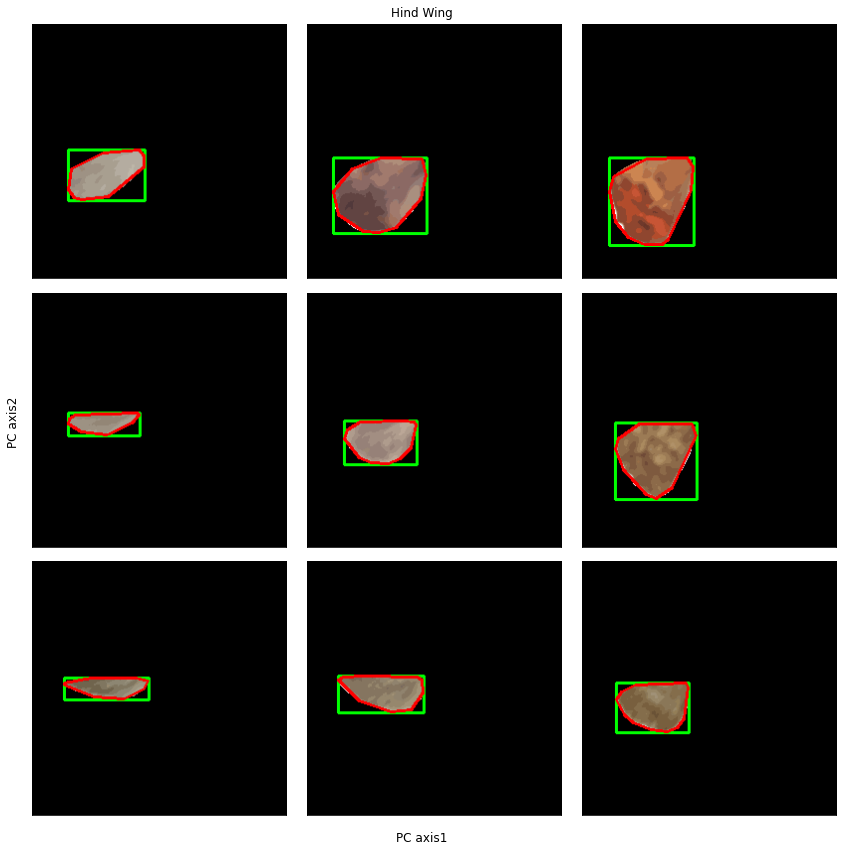

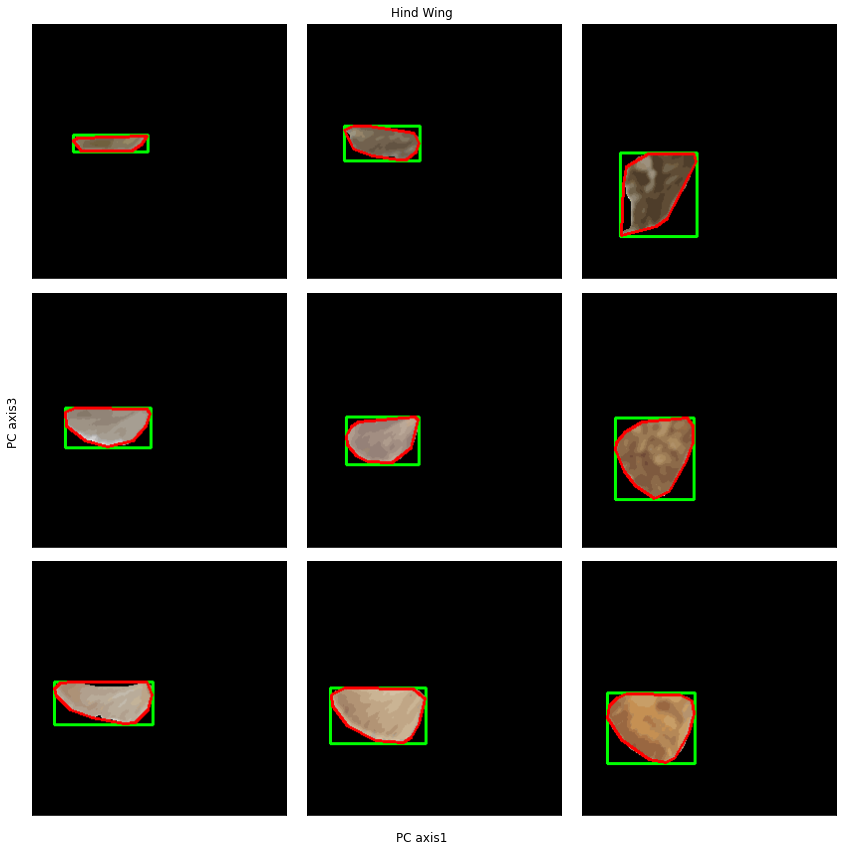

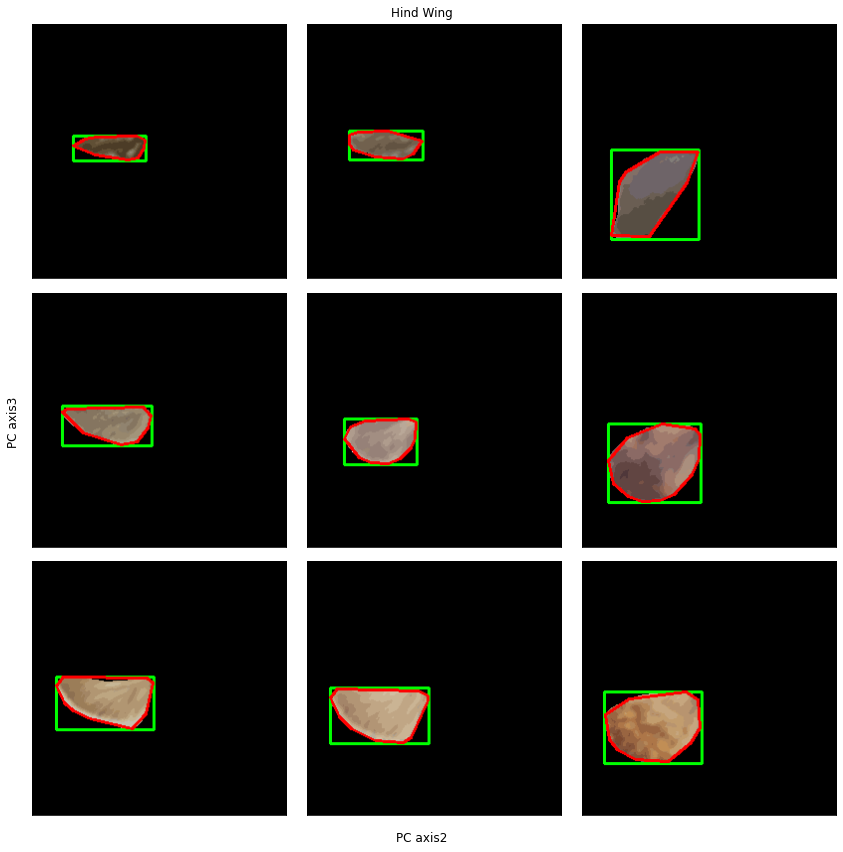

In [75]:
hole_ratios = []
peri2areas = []

plt.rcParams['figure.figsize'] = [12, 12]
# wing_fig_, wing_axes_ = plt.subplots(27, 3)

canvas_pcgroups_gen = [
    plt.subplots(3, 3),
    plt.subplots(3, 3),
    plt.subplots(3, 3)
]

#plt.rcParams['figure.figsize'] = [27, 9]
#wing_fig_, wing_axes_ = plt.subplots(3, 9)

for wing_i in range(len(img_fg_idxs)):
    #wing_i = 8
    x_max = max(img_fg_idxs[wing_i][1])
    x_min = min(img_fg_idxs[wing_i][1])
    y_max = max(img_fg_idxs[wing_i][0])
    y_min = min(img_fg_idxs[wing_i][0])

    #canvas = np.zeros((y_max-y_min+1, x_max-x_min+1), np.uint8)
    canvas = np.zeros((256, 256, 3), np.uint8)
    canvas_binary = np.zeros((256, 256), np.uint8)
    # canvas_contour_area = np.zeros((256, 256), np.uint8)
    
    for fg_i in range(len(img_fg_idxs[wing_i][1])):
        x = img_fg_idxs[wing_i][1][fg_i]# - x_min
        y = img_fg_idxs[wing_i][0][fg_i]# - y_min
        canvas_binary[y, x] = 1

    cntrs, _ = cv2.findContours(canvas_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    for cntr_i, cntr_ in enumerate(cntrs):
        #cvhull = cv2.convexHull(cntrs[cntr_i])
        #cvhull_area = PolyArea2D(cvhull.reshape(-1, 2))
        
        peri = cv2.arcLength(cntr_, True)
        peri2area = peri / cv2.contourArea(cntr_)
        
        approx = cv2.approxPolyDP(cntr_, 0.01 * peri, True)
        approx_area = cv2.contourArea(approx)
        approx_cvhull = cv2.convexHull(approx)
        approx_cvhull_area = cv2.contourArea(approx_cvhull) #PolyArea2D(approx_cvhull.reshape(-1, 2))

        if approx_area > 500:
            break

    if approx_area <= 500:
        print('Error again, stop here.')
        break

    peri2areas.append(peri2area)
    hole_ratios.append(1 - approx_area / approx_cvhull_area)
    
    block_x_shift = sum([int(ch)-(i+1) for i,ch in enumerate(query_axis.pc_plot_group[wing_i])])
    loc_x, loc_y = query_axis.loc[wing_i, 'pc'+query_axis.pc_plot_group[wing_i][0]], query_axis.loc[wing_i, 'pc'+query_axis.pc_plot_group[wing_i][1]]
    plt_a0_idx = int((-loc_y)/3 + 1)
    plt_a1_idx_ = int(loc_x/3 + 1)
    plt_a1_idx = int(block_x_shift*3 + plt_a1_idx_)
    
    canvas_cntr = distinct_color_canvases[wing_i].copy()
    cv2.rectangle(canvas_cntr, (bboxes[wing_i][0], bboxes[wing_i][1]), (bboxes[wing_i][2], bboxes[wing_i][3]), (0, 255, 0), 2)
    cv2.drawContours(canvas_cntr, [approx_cvhull], 0, (255, 0, 0), thickness=2)
    
    
    canvas_pcgroups_gen[block_x_shift][1][plt_a0_idx, plt_a1_idx_].imshow(canvas_cntr)
    canvas_pcgroups_gen[block_x_shift][1][plt_a0_idx, plt_a1_idx_].get_xaxis().set_visible(False)
    canvas_pcgroups_gen[block_x_shift][1][plt_a0_idx, plt_a1_idx_].get_yaxis().set_visible(False)
    canvas_pcgroups_gen[block_x_shift][0].tight_layout()
    canvas_pcgroups_gen[block_x_shift][0].supxlabel('PC axis'+query_axis.pc_plot_group[wing_i][0])
    canvas_pcgroups_gen[block_x_shift][0].supylabel('PC axis'+query_axis.pc_plot_group[wing_i][1])
    canvas_pcgroups_gen[block_x_shift][0].suptitle(f'{"Hind Wing" if target_wings == "hw" else "Fore Wing"}')



In [76]:
# canvas_pcgroups_gen[0][0].savefig(f'./supplementary_materials/{target_wings}/{target_wings}_General-PC_axis12.png')
# canvas_pcgroups_gen[0][0].savefig(f'./supplementary_materials/{target_wings}/{target_wings}_General-PC_axis12.pdf')
# ###
# canvas_pcgroups_gen[1][0].savefig(f'./supplementary_materials/{target_wings}/{target_wings}_General-PC_axis13.png')
# canvas_pcgroups_gen[1][0].savefig(f'./supplementary_materials/{target_wings}/{target_wings}_General-PC_axis13.pdf')
# ###
# canvas_pcgroups_gen[2][0].savefig(f'./supplementary_materials/{target_wings}/{target_wings}_General-PC_axis23.png')
# canvas_pcgroups_gen[2][0].savefig(f'./supplementary_materials/{target_wings}/{target_wings}_General-PC_axis23.pdf')

In [77]:
# plt.rcParams['figure.figsize'] = [5, 5]
# plt.imshow(canvas)

# canvas_cntr = canvas.copy()
# cv2.drawContours(canvas_cntr, cntrs, 0, 255)
# plt.imshow(canvas_cntr)

# peri = cv2.arcLength(cntrs[0], True)
# approx = cv2.approxPolyDP(cntrs[0], 0.01 * peri, True)

# canvas_cntr = canvas.copy()
# cv2.drawContours(canvas_cntr, [approx], 0, 255)
# plt.imshow(canvas_cntr)

# canvas_cntr = canvas.copy()
# cv2.drawContours(canvas_cntr, [approx_cvhull], 0, 255)
# plt.imshow(canvas_cntr)

### Batch regressions

In [78]:
target_measurements = dict(
    color_saturation = hsv_mean[:, 1],
    color_brightness = gray_mean,
    color_richness = distinct_colors,
    color_evenness = color_evenness,
    rgb_red = rgb_means[:, 0],
    rgb_green = rgb_means[:, 1],
    rgb_blue = rgb_means[:, 2],
    distinctive_from_wing_base = feat_on_x_edge_indices,
    # misc_convex_ratio = hole_ratios,
    perimeter_over_area = peri2areas,
    # proxy_area = proxy_areas,
    box_aspect_ratio = proxy_aspect_ratios,
)

In [79]:
target_axes = [f'pc{a}' for a in [1,2,3]]

In [80]:
wing_characters[target_wings] = pd.DataFrame(dict(pc1=pc1v, pc2=pc2v, pc3=pc3v))

In [81]:
for key in target_measurements.keys():
    target_var = target_measurements[key]
    wing_characters[target_wings][key] = target_var

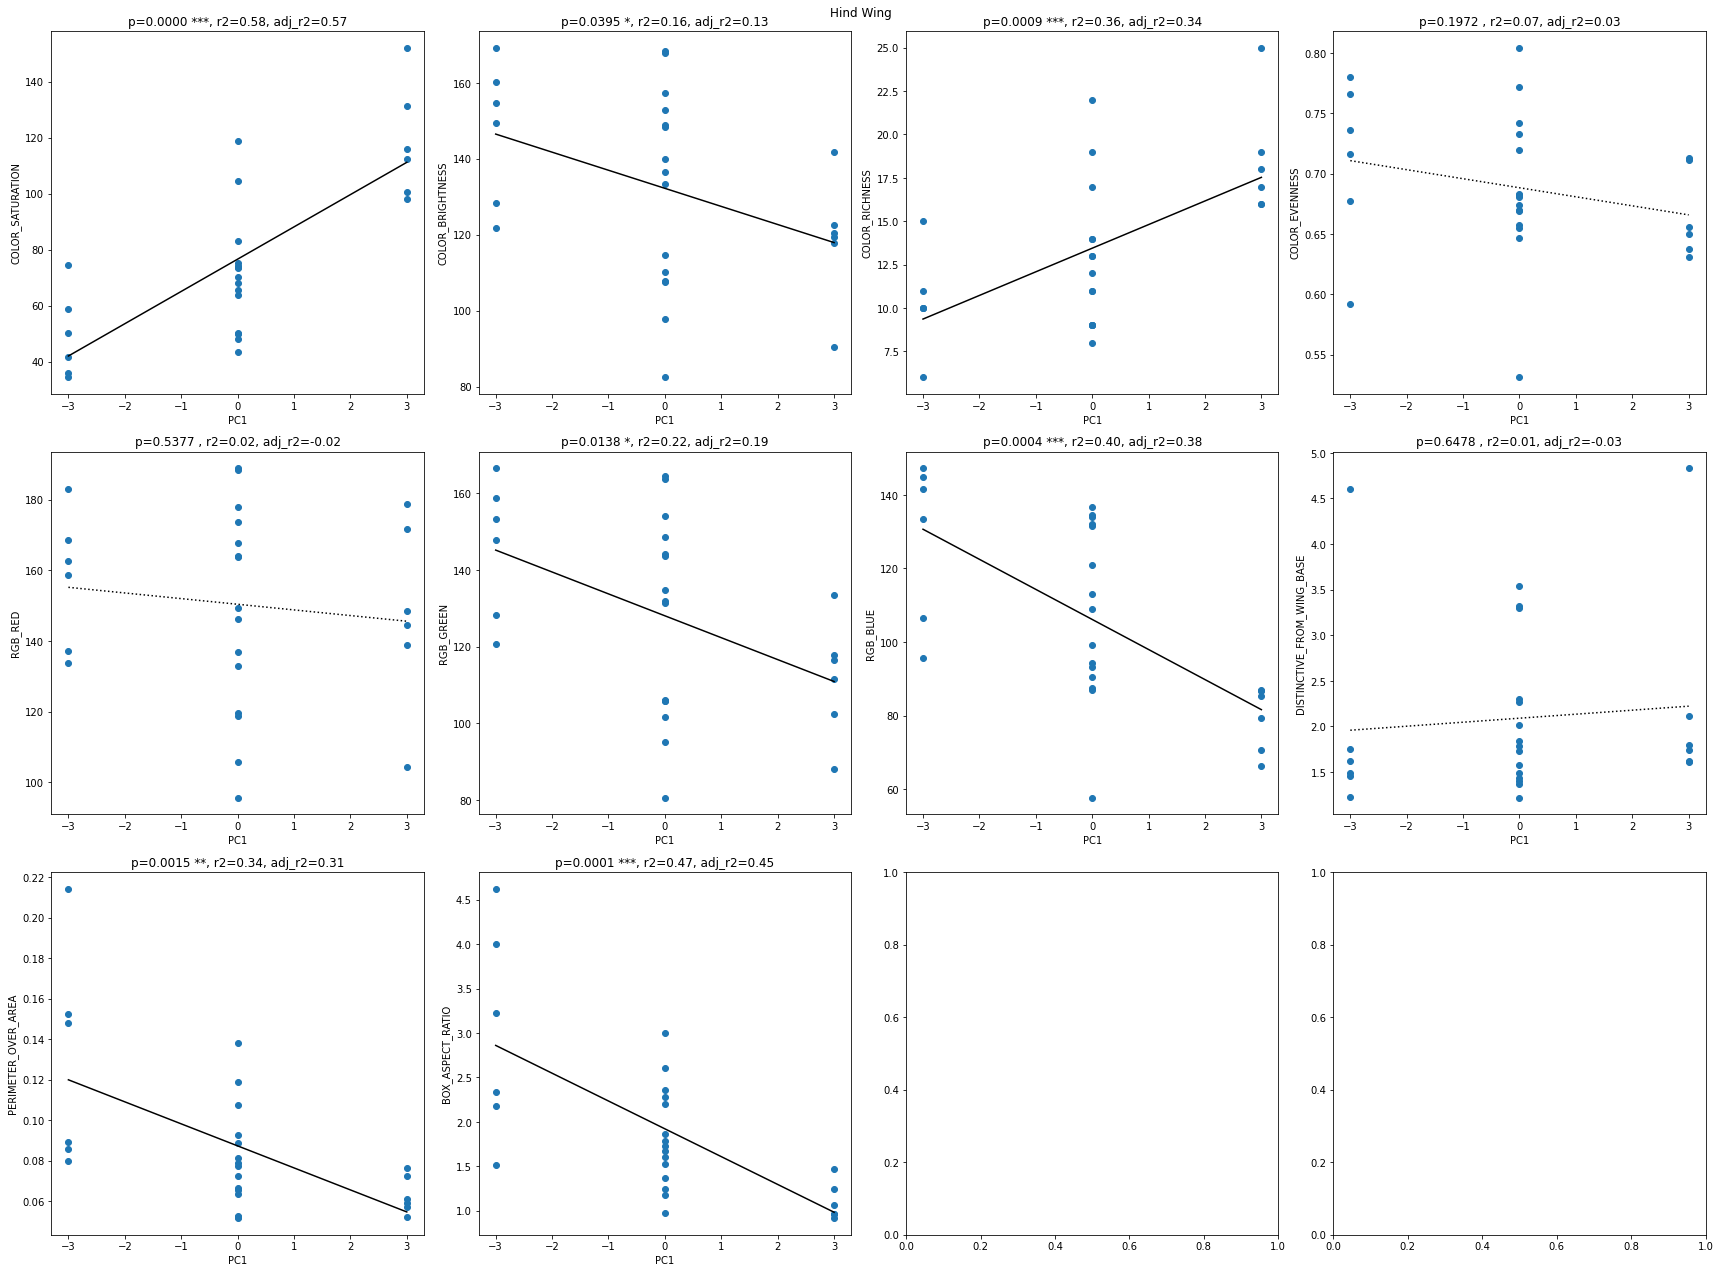

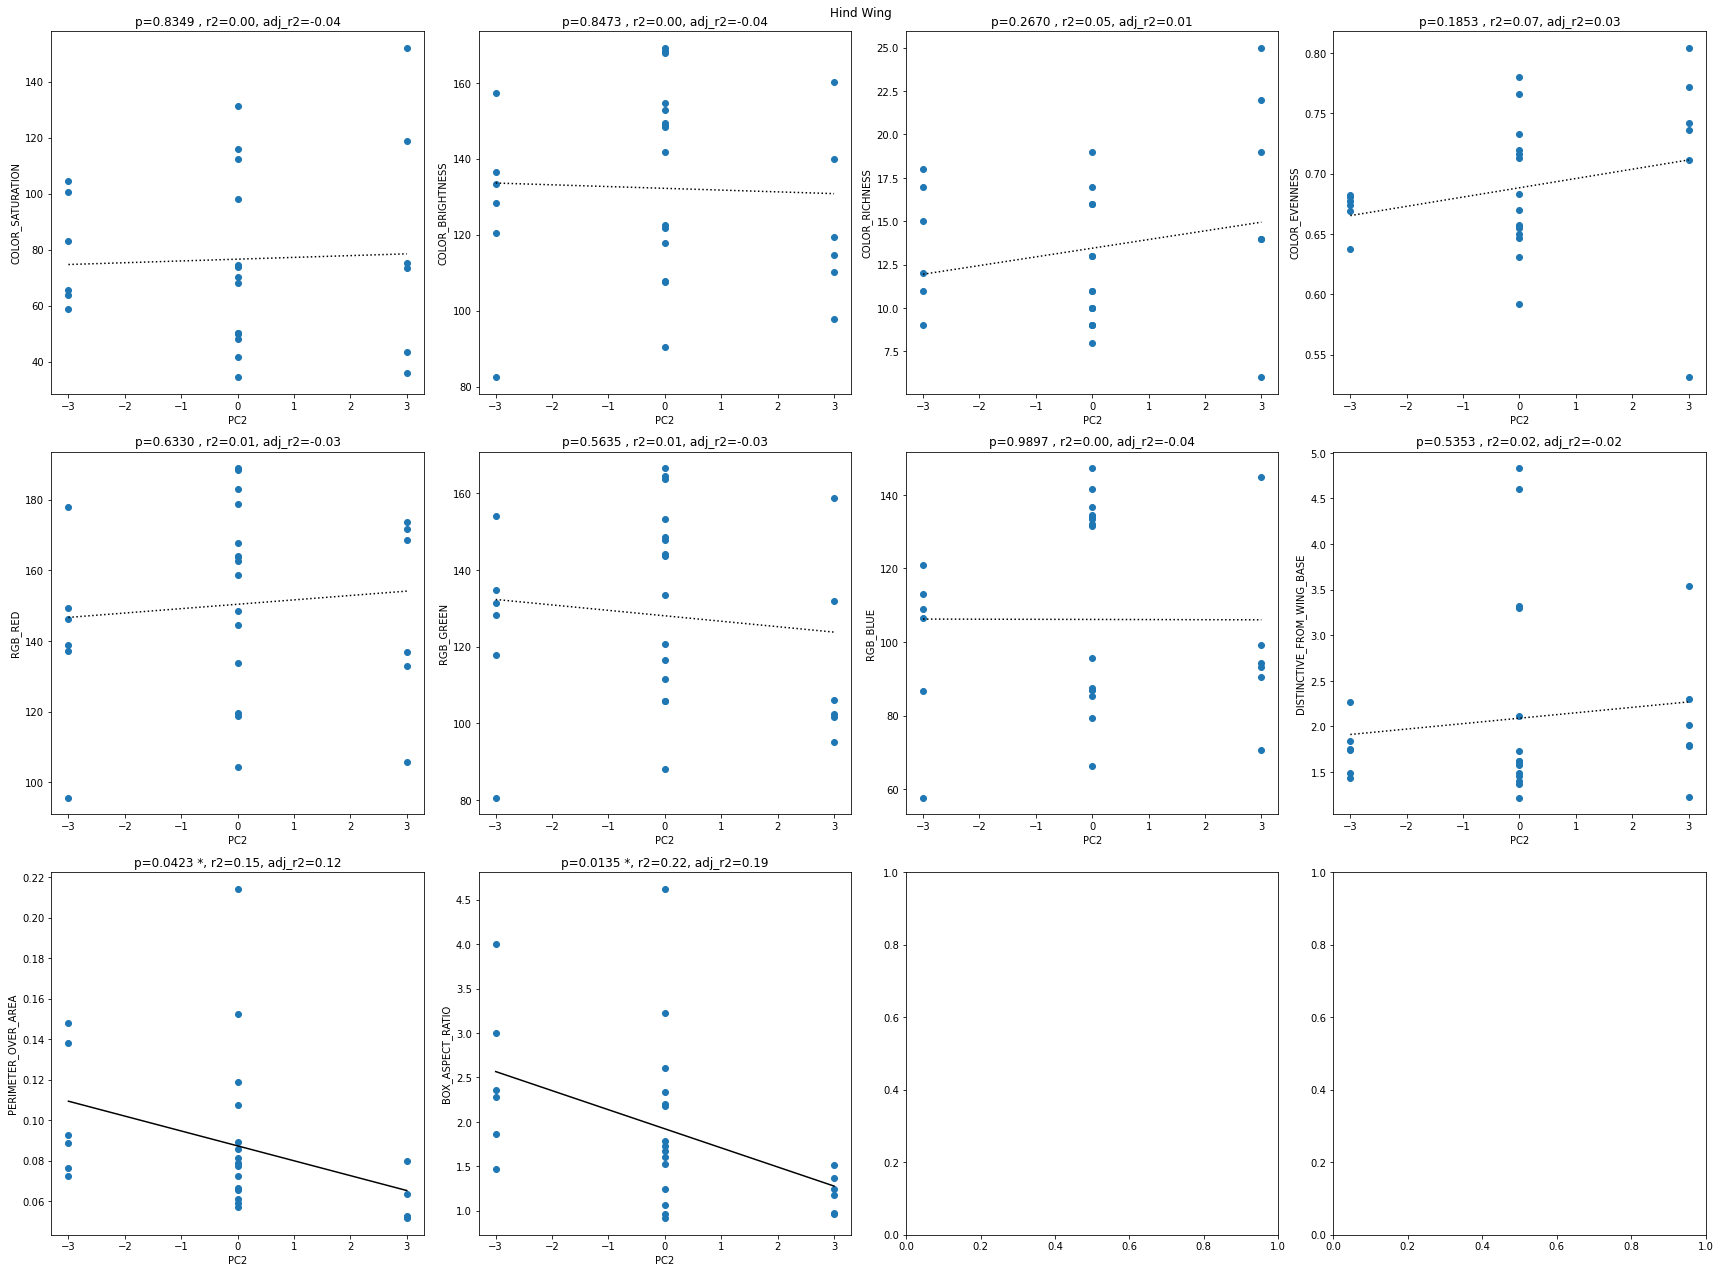

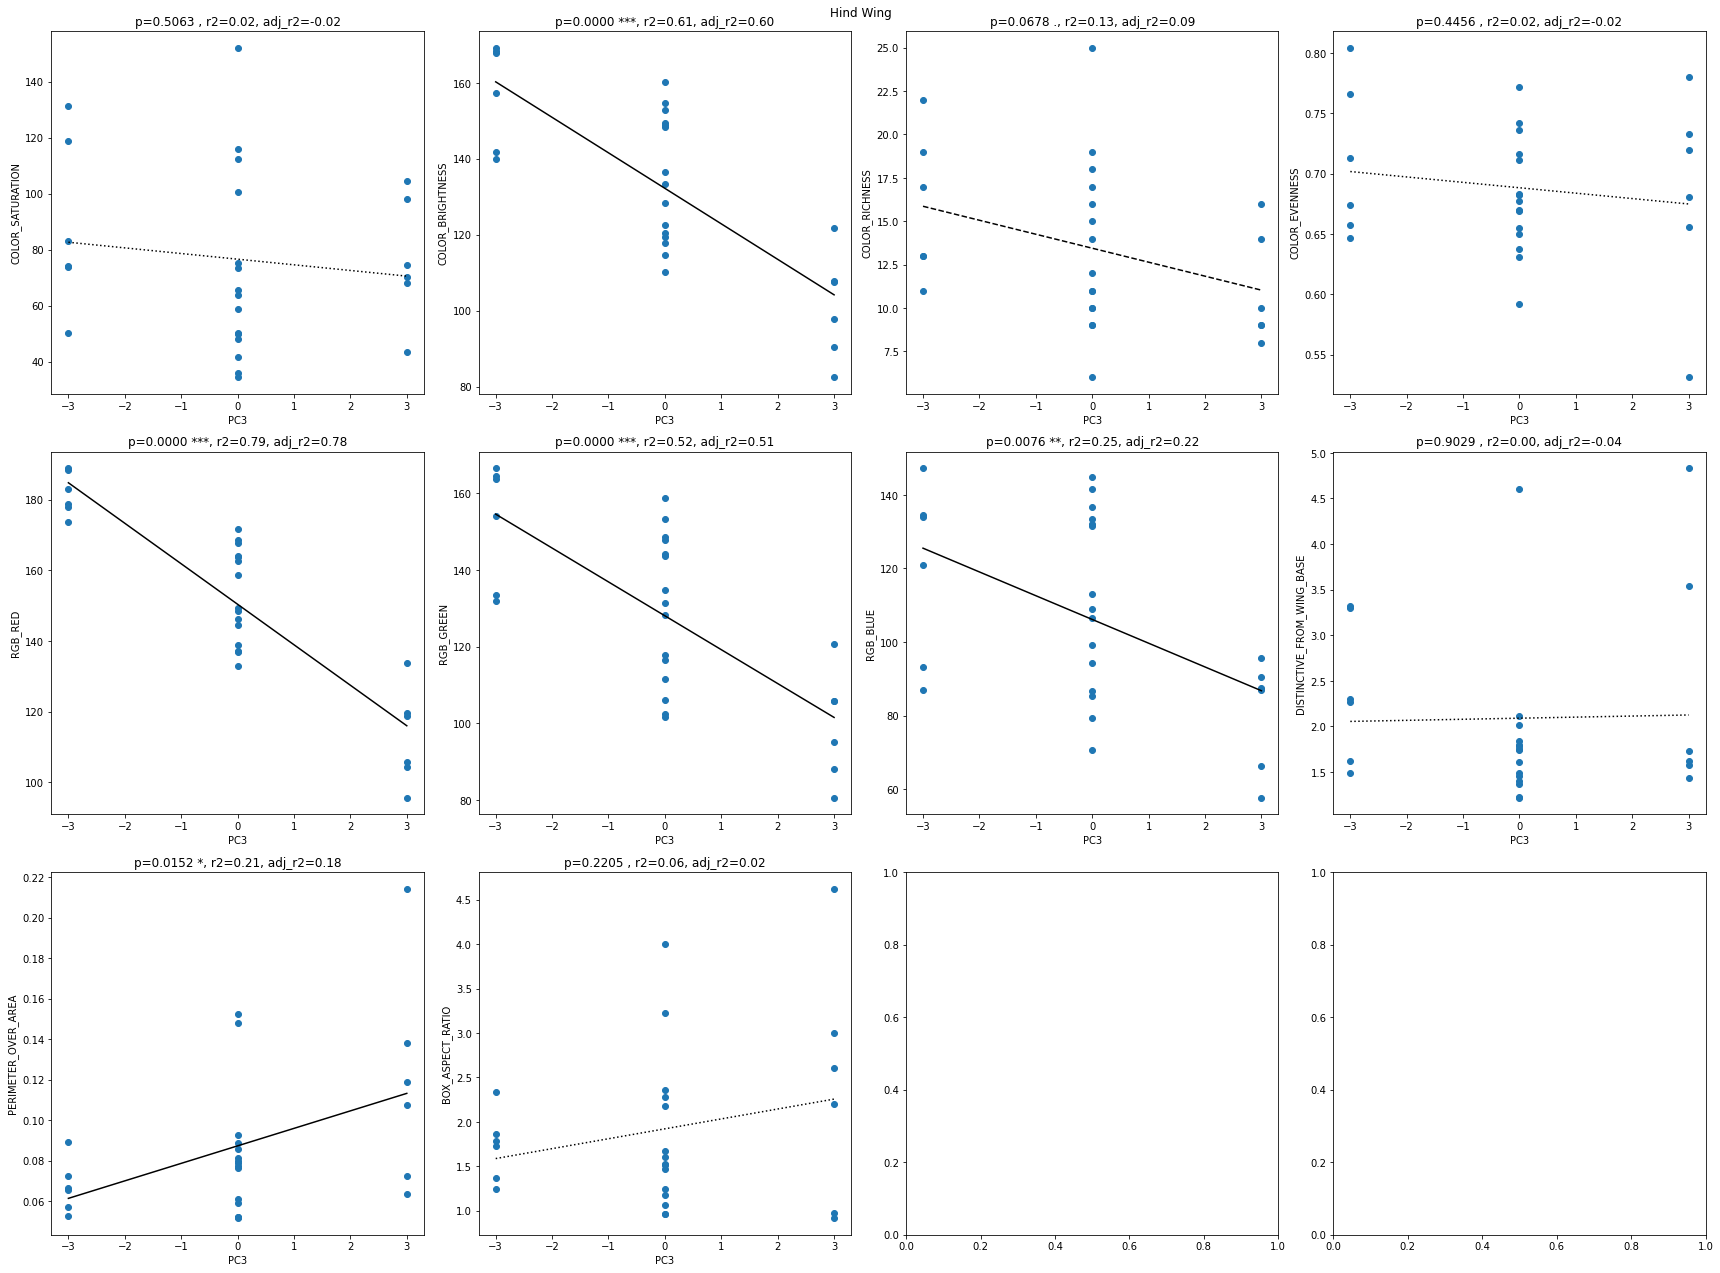

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression

plt.rcParams['figure.figsize'] = [24, 18]
# wing_fig_, wing_axes_ = plt.subplots(27, 3)

canvas_pcgroups_lm = [
    plt.subplots(3, 4),
    plt.subplots(3, 4),
    plt.subplots(3, 4)
]

rows_ = []
#plt.rcParams['figure.figsize'] = [5, 5]
for target_axis in target_axes:
    for key_id_, key in enumerate(target_measurements.keys()):
        lm = LinearRegression()
        X = wing_characters[target_wings][[target_axis]]
        y = wing_characters[target_wings][key]
        lm.fit(X, y)
        r_squared = lm.score(X, y)
        adj_r_squared = r_squared - (1 - r_squared) * (X.shape[1] / (X.shape[0] - X.shape[1] - 1))
        Fstat, p = f_regression(X, y)
        sig = ''
        linestyle = 'dotted'
        if p[0] < 1e-3:
            sig = '***'
            linestyle = 'solid'
        elif p[0] < 1e-2:
            sig = '**'
            linestyle = 'solid'
        elif p[0] < 5e-2:
            sig = '*'
            linestyle = 'solid'
        elif p[0] < 1e-1:
            sig = '.'
            linestyle = 'dashed'
            
        rows_.append([target_wings, target_axis, key, lm.intercept_, lm.coef_[0], p[0], sig, r_squared, adj_r_squared, Fstat[0]])
        
        
        block_x_shift = int(target_axis[-1]) - 1
        axis_ = canvas_pcgroups_lm[block_x_shift][1][int(key_id_//4)][int(key_id_%4)]
        axis_.scatter(X, y)
        axis_.set_ylabel(key.upper())
        axis_.set_xlabel(target_axis.upper())
        axis_.set_title(f'p={p[0]:.04f} {sig}, r2={r_squared:.02f}, adj_r2={adj_r_squared:0.2f}')
        axis_.plot([-3, 3], [-3 * lm.coef_[0] + lm.intercept_, 3 * lm.coef_[0] + lm.intercept_], color='k', linestyle=linestyle)
        canvas_pcgroups_lm[block_x_shift][0].suptitle(f'{"Hind Wing" if target_wings == "hw" else "Fore Wing"}')
        canvas_pcgroups_lm[block_x_shift][0].tight_layout()
        #plt.savefig(f'./bg_removed/lm_figs/{target_wings}/{target_wings}_{target_axis}_{key}.jpg')
        #plt.close()


In [250]:
# canvas_pcgroups_lm[0][0].savefig(f'./supplementary_materials/{target_wings}/{target_wings}_LM-PC_axis1.png')
# canvas_pcgroups_lm[0][0].savefig(f'./supplementary_materials/{target_wings}/{target_wings}_LM-PC_axis1.pdf')
# ###
# canvas_pcgroups_lm[1][0].savefig(f'./supplementary_materials/{target_wings}/{target_wings}_LM-PC_axis2.png')
# canvas_pcgroups_lm[1][0].savefig(f'./supplementary_materials/{target_wings}/{target_wings}_LM-PC_axis2.pdf')
# ###
# canvas_pcgroups_lm[2][0].savefig(f'./supplementary_materials/{target_wings}/{target_wings}_LM-PC_axis3.png')
# canvas_pcgroups_lm[2][0].savefig(f'./supplementary_materials/{target_wings}/{target_wings}_LM-PC_axis3.pdf')

In [296]:
wing_characters_stats[target_wings] = pd.DataFrame(rows_, columns=['wing', 'axis', 'character', 'lm_alpha', 'lm_beta', 'p', 'sig', 'r2', 'adj_r2', 'F'])

In [297]:
wing_characters_stats[target_wings]

,wing,axis,character,lm_alpha,lm_beta,p,sig,r2,adj_r2,F
0,hw,pc1,color_saturation,76.594378,11.527133,3.530164e-06,***,0.583661,0.567007,35.047171
1,hw,pc1,color_brightness,132.224580,-4.763618,3.952416e-02,*,0.158779,0.125130,4.718705
2,hw,pc1,color_richness,13.444444,1.361111,8.758052e-04,***,0.363347,0.337881,14.267887
3,hw,pc1,color_evenness,0.688268,-0.007495,1.971717e-01,,0.065612,0.028237,1.755488
4,hw,pc1,rgb_red,150.394839,-1.599771,5.376919e-01,,0.015380,-0.024004,0.390514
5,hw,pc1,rgb_green,128.031033,-5.712389,1.382040e-02,*,0.219039,0.187801,7.011845
6,hw,pc1,rgb_blue,106.147831,-8.169478,3.619053e-04,***,0.404641,0.380827,16.991478
7,hw,pc1,distinctive_from_wing_base,8.498157,0.269099,7.124402e-01,,0.005528,-0.034250,0.138979
8,hw,pc1,perimeter_over_area,0.087375,-0.010861,1.451961e-03,**,0.338632,0.312177,12.800433
9,hw,pc1,box_aspect_ratio,1.922499,-0.312859,8.387399e-05,***,0.467717,0.446426,21.967496


In [298]:
wing_characters_stats[target_wings].to_csv(f'./supplementary_materials/{target_wings}_characters_stats_20230518.csv', index=False, sep='\t')

In [299]:
wing_characters[target_wings].to_csv(f'./supplementary_materials/{target_wings}_characters_20230518.csv', index=False, sep='\t')

In [45]:
# wing_characters_stats['fw'].to_csv(f'./bg_removed/lm_figs/fw_characters_stats.csv', index=False, sep='\t')
# wing_characters_stats['hw'].to_csv(f'./bg_removed/lm_figs/hw_characters_stats.csv', index=False, sep='\t')

In [312]:
fw_chars = pd.read_csv(f'./supplementary_materials/fw_characters_20230518.csv', sep='\t')
hw_chars = pd.read_csv(f'./supplementary_materials/hw_characters_20230518.csv', sep='\t')

In [313]:
fw_chars.sort_values(['pc1', 'pc2', 'pc3'], inplace=True)
hw_chars.sort_values(['pc1', 'pc2', 'pc3'], inplace=True)
fw_chars.reset_index(drop=True, inplace=True)
hw_chars.reset_index(drop=True, inplace=True)

In [314]:
assert((fw_chars[['pc1', 'pc2', 'pc3']] == hw_chars[['pc1', 'pc2', 'pc3']]).all().all())

In [315]:
fw_hw_area_ratio = fw_chars.proxy_area / hw_chars.proxy_area

AttributeError: 'DataFrame' object has no attribute 'proxy_area'

In [317]:
fw_hw_area_ratio

0     1.254585
1     0.896277
2     1.218182
3     0.634789
4     1.555811
5     0.783067
6     0.797009
7     0.945538
8     0.822917
9     1.356979
10    1.070551
11    1.044842
12    1.527933
13    1.471374
14    1.423148
15    1.259518
16    1.047286
17    1.049772
18    1.011582
19    0.986772
20    1.068507
21    1.369165
22    1.229658
23    1.295052
24    1.198033
25    1.368923
26    1.082855
Name: proxy_area, dtype: float64

In [318]:
fw_hw_area_ratio_df = fw_chars[['pc1', 'pc2', 'pc3']].copy()

In [319]:
fw_hw_area_ratio_df['fw_hw_area_ratio'] = fw_hw_area_ratio

In [320]:
fw_hw_area_ratio_df

,pc1,pc2,pc3,fw_hw_area_ratio
0,-3,-3,0,1.254585
1,-3,0,-3,0.896277
2,-3,0,0,1.218182
3,-3,0,0,0.634789
4,-3,0,3,1.555811
5,-3,3,0,0.783067
6,0,-3,-3,0.797009
7,0,-3,0,0.945538
8,0,-3,0,0.822917
9,0,-3,3,1.356979


In [321]:
target_measurements_no_proxy_area = [
    'color_saturation',
    'color_brightness',
    'color_richness',
    'color_evenness',
    'rgb_red',
    'rgb_green',
    'rgb_blue',
    'distinctive_from_wing_base',
    'perimeter_over_area',
    'box_aspect_ratio']
target_axes = [f'pc{a}' for a in [1,2,3]]

In [322]:
# target_measurements_no_proxy_area = target_measurements.copy()

In [323]:
# del(target_measurements_no_proxy_area['proxy_area'])

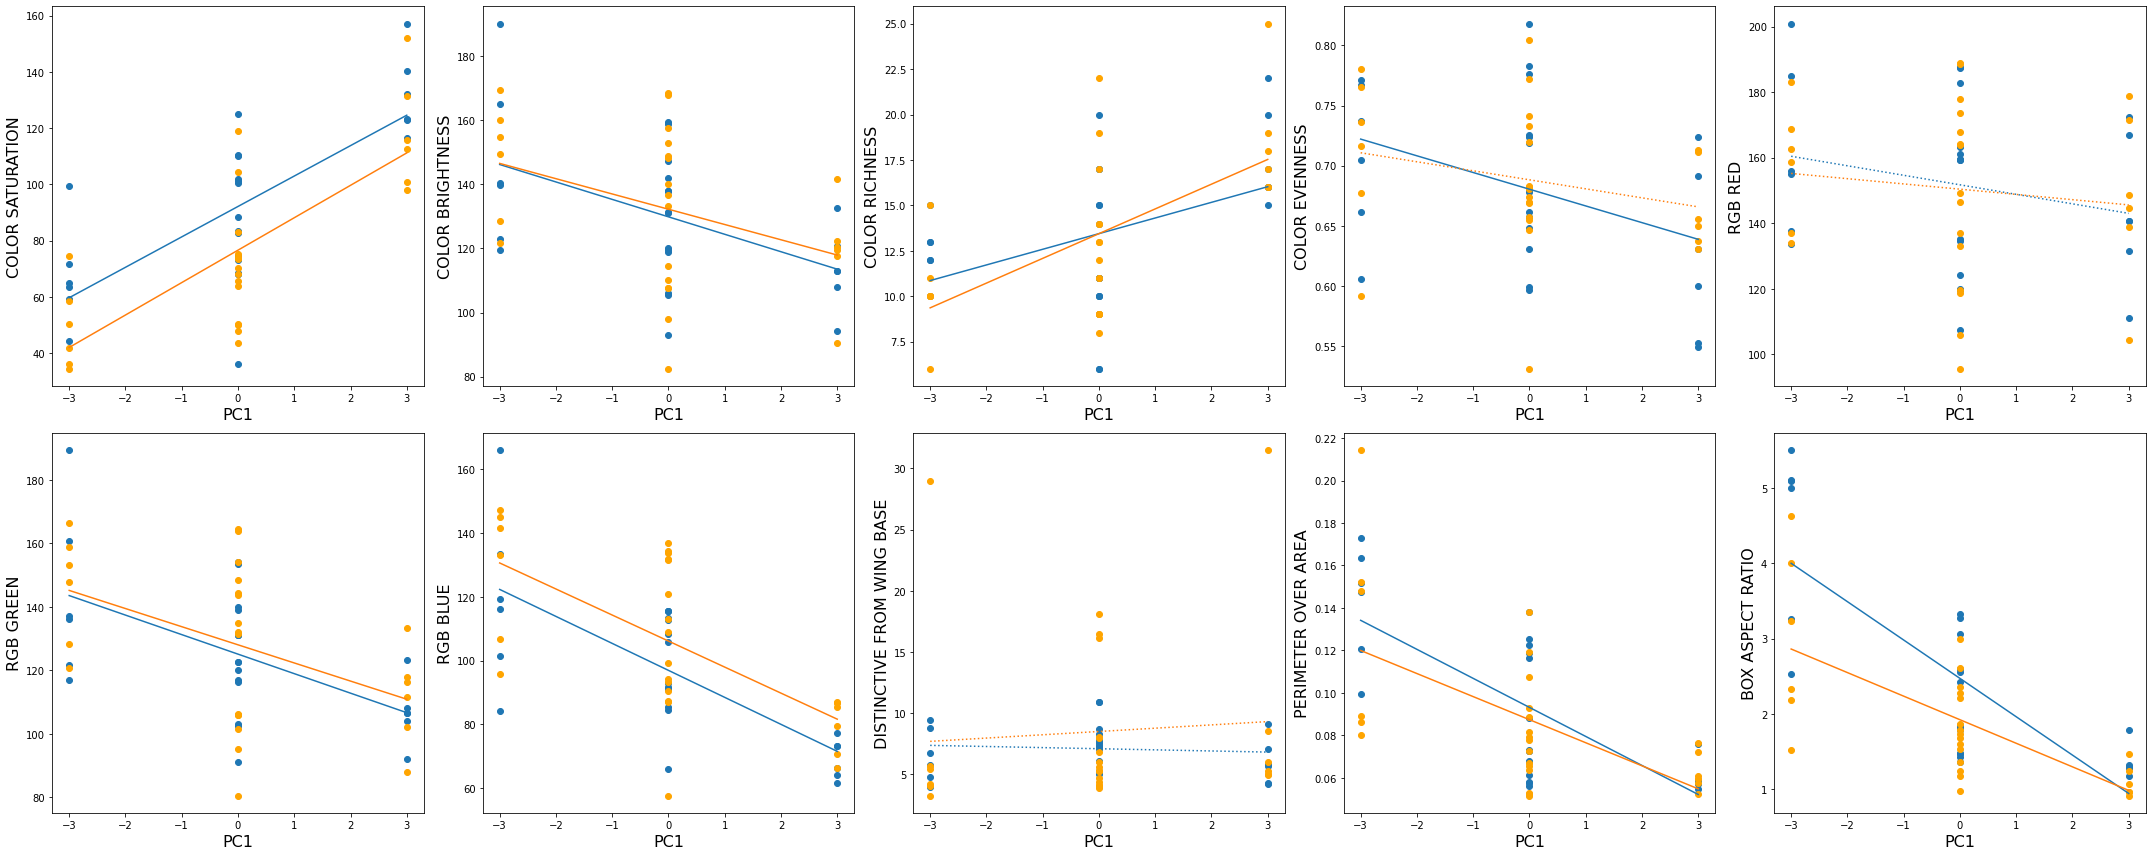

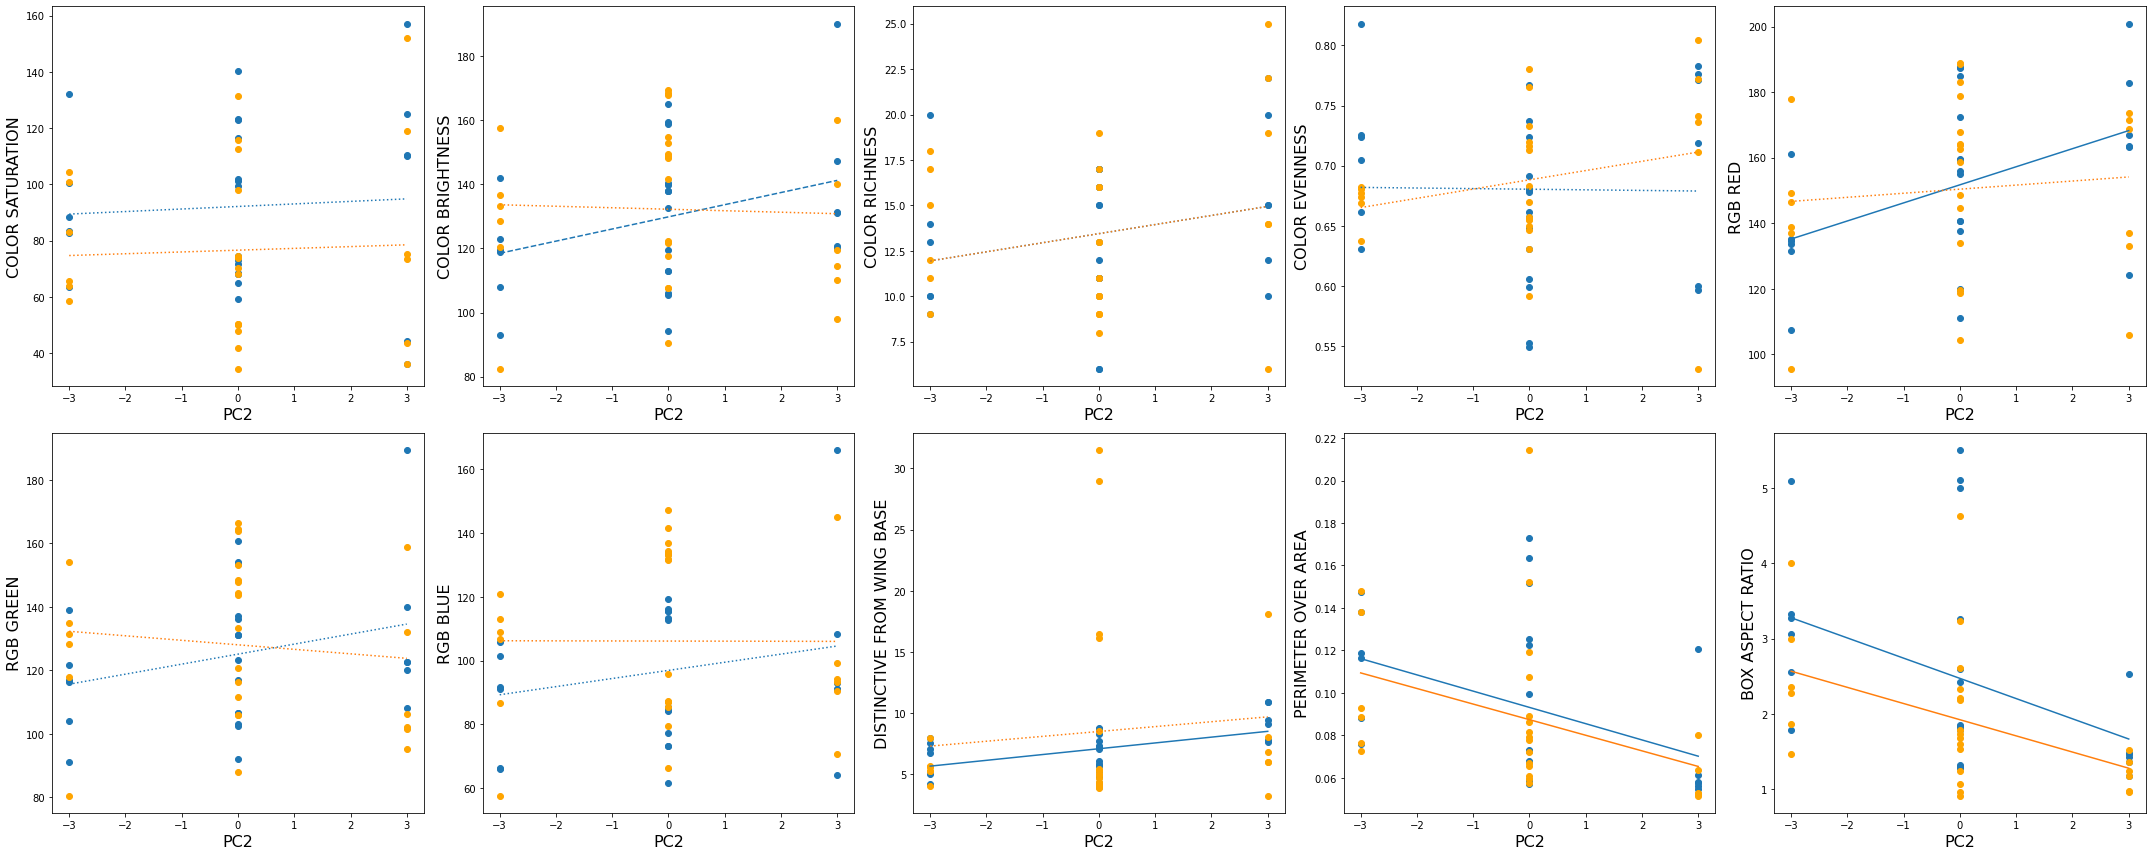

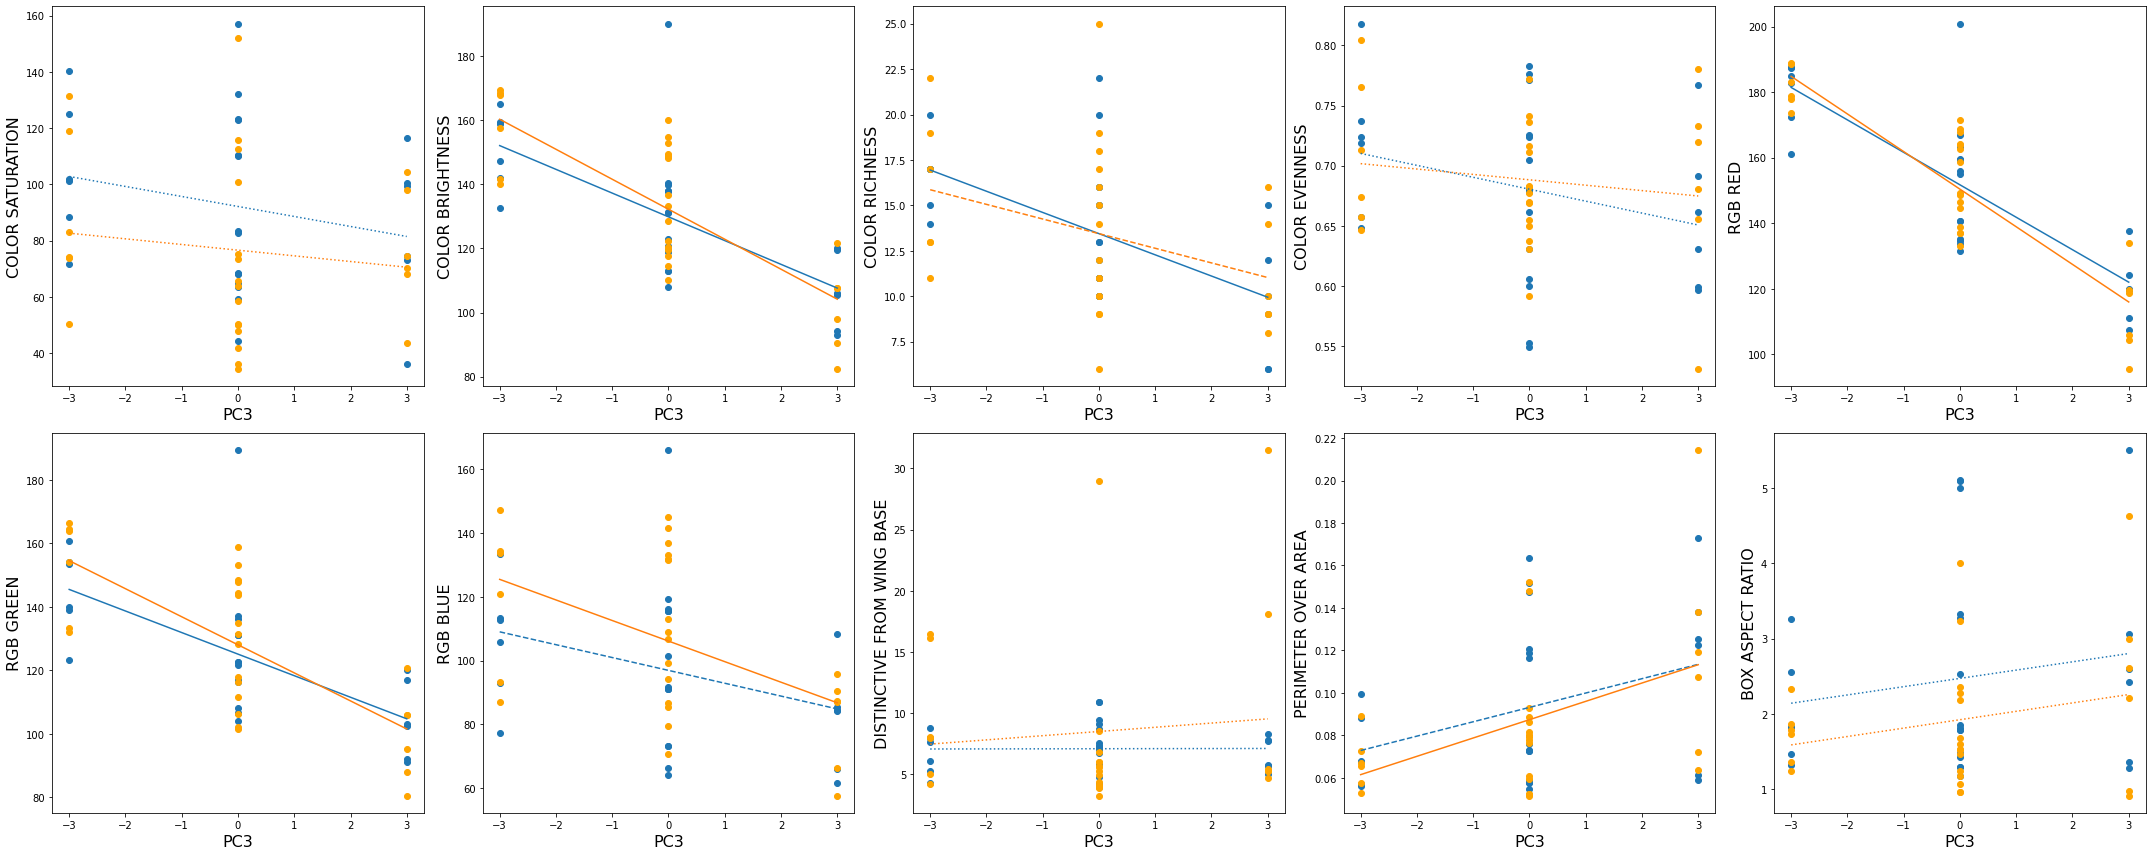

In [324]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
import matplotlib as mpl

plt.rcParams['figure.figsize'] = [30, 12]
mpl.rcParams['pdf.fonttype'] = 42

# wing_fig_, wing_axes_ = plt.subplots(27, 3)

canvas_pcgroups_lm = [
    plt.subplots(2, 5),
    plt.subplots(2, 5),
    plt.subplots(2, 5)
]

rows_ = []
#plt.rcParams['figure.figsize'] = [5, 5]
for target_axis in target_axes:
    for key_id_, key in enumerate(target_measurements_no_proxy_area):

        block_x_shift = int(target_axis[-1]) - 1
        axis_ = canvas_pcgroups_lm[block_x_shift][1][int(key_id_//5)][int(key_id_%5)]
        
        lm = LinearRegression()
        X = fw_chars[[target_axis]]
        y = fw_chars[key]
        lm.fit(X, y)
        r_squared = lm.score(X, y)
        adj_r_squared = r_squared - (1 - r_squared) * (X.shape[1] / (X.shape[0] - X.shape[1] - 1))
        Fstat, p = f_regression(X, y)
        sig = ''
        linestyle = 'dotted'
        if p[0] < 1e-3:
            sig = '***'
            linestyle = 'solid'
        elif p[0] < 1e-2:
            sig = '**'
            linestyle = 'solid'
        elif p[0] < 5e-2:
            sig = '*'
            linestyle = 'solid'
        elif p[0] < 1e-1:
            sig = '.'
            linestyle = 'dashed'
            
        axis_.scatter(X, y)
        # axis_.text(x=-3, y=np.max([fw_chars[key], hw_chars[key]]), s=f'p={p[0]:.04f} {sig}, r2={r_squared:.02f}, adj_r2={adj_r_squared:0.2f}', color='tab:blue', fontsize=16)
        axis_.plot([-3, 3], [-3 * lm.coef_[0] + lm.intercept_, 3 * lm.coef_[0] + lm.intercept_], color='tab:blue', linestyle=linestyle)

        ##############################
        
        lm = LinearRegression()
        X = hw_chars[[target_axis]]
        y = hw_chars[key]
        lm.fit(X, y)
        r_squared = lm.score(X, y)
        adj_r_squared = r_squared - (1 - r_squared) * (X.shape[1] / (X.shape[0] - X.shape[1] - 1))
        Fstat, p = f_regression(X, y)
        sig = ''
        linestyle = 'dotted'
        if p[0] < 1e-3:
            sig = '***'
            linestyle = 'solid'
        elif p[0] < 1e-2:
            sig = '**'
            linestyle = 'solid'
        elif p[0] < 5e-2:
            sig = '*'
            linestyle = 'solid'
        elif p[0] < 1e-1:
            sig = '.'
            linestyle = 'dashed'
            
        axis_.scatter(X, y, c='orange')
        # axis_.set_ylabel(key.upper())
        # axis_.set_xlabel(target_axis.upper())
        # axis_.set_title(f'p={p[0]:.04f} {sig}, r2={r_squared:.02f}, adj_r2={adj_r_squared:0.2f}')
        #axis_.set_title(key.upper())
        
        axis_.set_ylabel(key.upper().replace('_', ' '), fontsize=16)
        axis_.set_xlabel(target_axis.upper(), fontsize=16)
        
        #txt_y_shift = (np.max([fw_chars[key], hw_chars[key]]) - np.min([fw_chars[key], hw_chars[key]])) / 20
        #axis_.text(x=-3, y=np.max([fw_chars[key], hw_chars[key]]) - txt_y_shift, s=f'p={p[0]:.04f} {sig}, r2={r_squared:.02f}, adj_r2={adj_r_squared:0.2f}', color='tab:orange', fontsize=16)
        axis_.plot([-3, 3], [-3 * lm.coef_[0] + lm.intercept_, 3 * lm.coef_[0] + lm.intercept_], color='tab:orange', linestyle=linestyle)
        
    ######################

#     if False:
#         block_x_shift = int(target_axis[-1]) - 1
#         axis_ = canvas_pcgroups_lm[block_x_shift][1][2][3]

#         lm = LinearRegression()
#         X = fw_hw_area_ratio_df[[target_axis]]
#         y = fw_hw_area_ratio_df['fw_hw_area_ratio']
#         lm.fit(X, y)
#         r_squared = lm.score(X, y)
#         adj_r_squared = r_squared - (1 - r_squared) * (X.shape[1] / (X.shape[0] - X.shape[1] - 1))
#         Fstat, p = f_regression(X, y)
#         sig = ''
#         linestyle = 'dotted'
#         if p[0] < 1e-3:
#             sig = '***'
#             linestyle = 'solid'
#         elif p[0] < 1e-2:
#             sig = '**'
#             linestyle = 'solid'
#         elif p[0] < 5e-2:
#             sig = '*'
#             linestyle = 'solid'
#         elif p[0] < 1e-1:
#             sig = '.'
#             linestyle = 'dashed'

#         axis_.scatter(X, y, c='tab:green')
#         # axis_.set_ylabel('fw_hw_area_ratio'.upper())
#         # axis_.set_xlabel(target_axis.upper())
#         # axis_.set_title(f'p={p[0]:.04f} {sig}, r2={r_squared:.02f}, adj_r2={adj_r_squared:0.2f}')
#         axis_.set_title('fw_hw_area_ratio'.upper())
#         axis_.text(x=-3, y=np.max(y), s=f'p={p[0]:.04f} {sig}, r2={r_squared:.02f}, adj_r2={adj_r_squared:0.2f}', color='tab:green')
#         axis_.plot([-3, 3], [-3 * lm.coef_[0] + lm.intercept_, 3 * lm.coef_[0] + lm.intercept_], color='green', linestyle=linestyle)

    #canvas_pcgroups_lm[block_x_shift][0].suptitle(target_axis.upper(), size=24)
    canvas_pcgroups_lm[block_x_shift][0].tight_layout()
    canvas_pcgroups_lm[block_x_shift][0].savefig(f'./supplementary_materials/aw/aw_LM-{target_axis}_no_stats.pdf')

In [29]:
#################################

/home/ess/anaconda3/envs/bury_beetles/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app


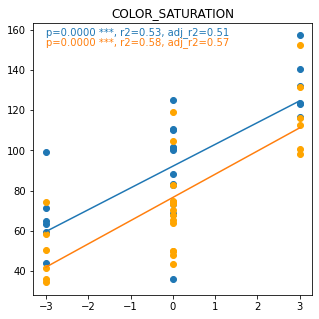

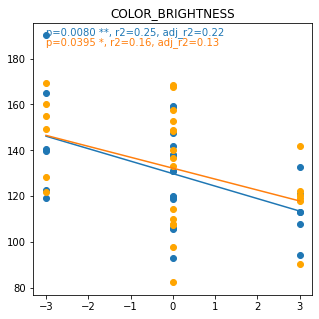

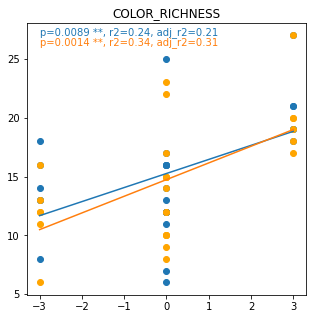

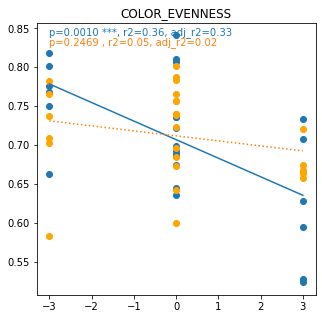

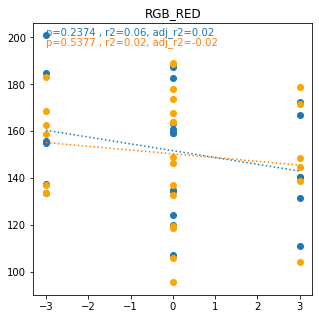

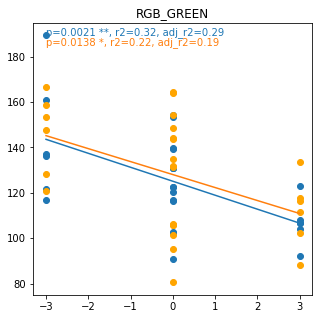

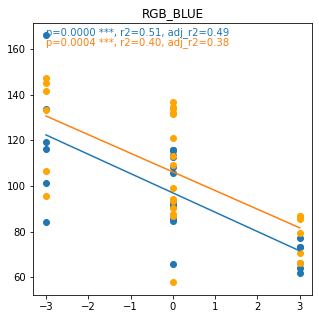

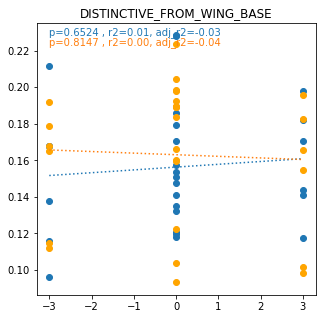

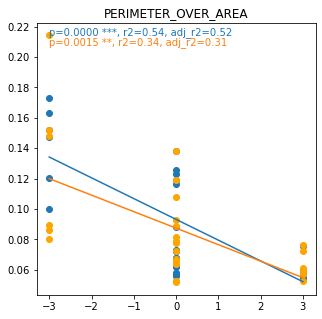

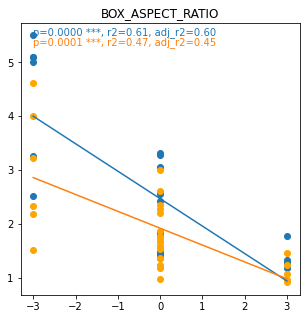

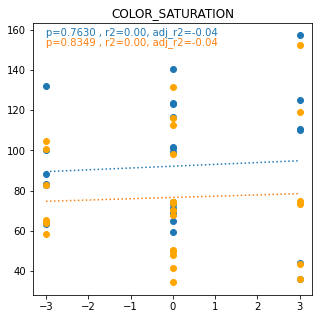

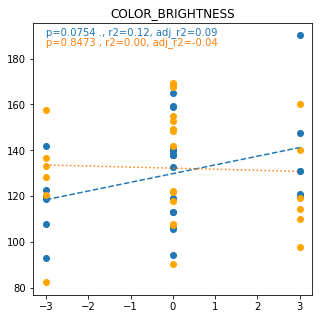

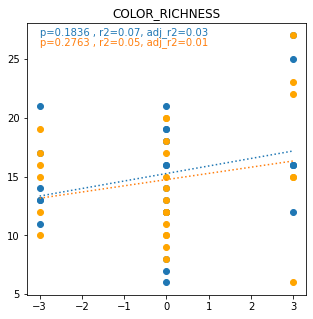

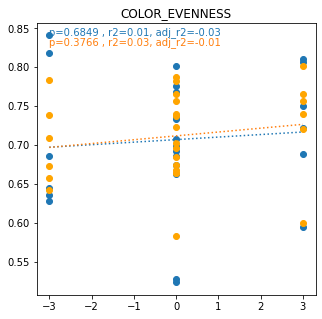

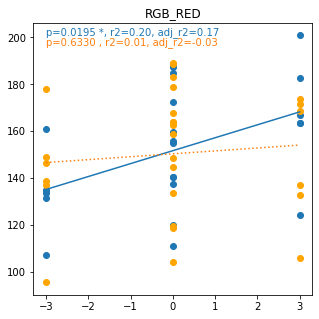

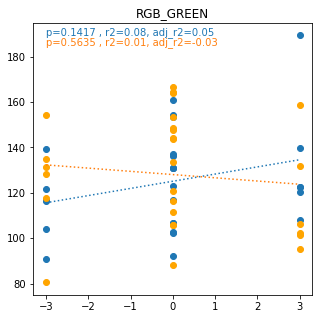

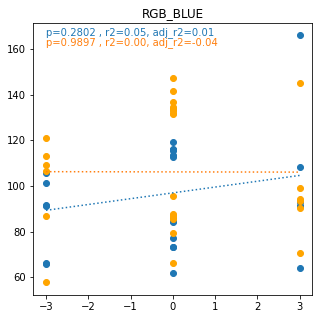

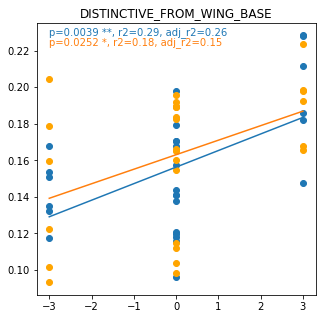

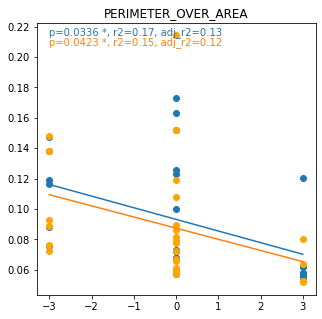

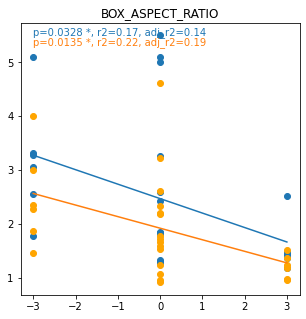

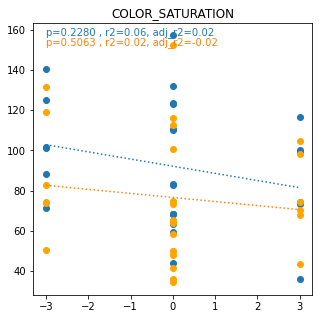

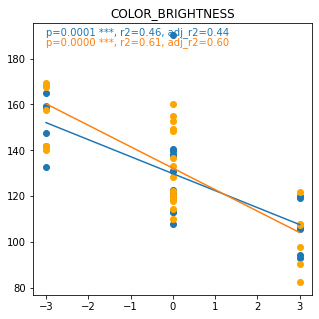

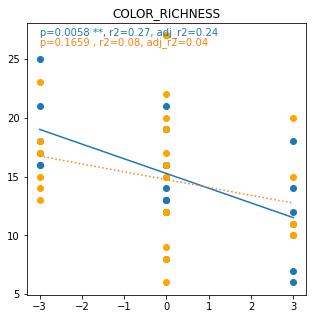

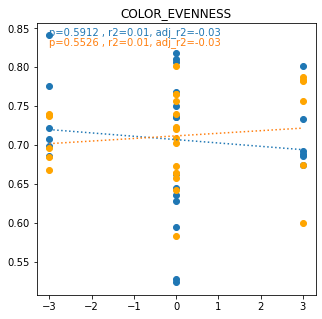

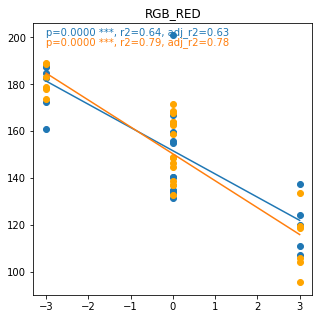

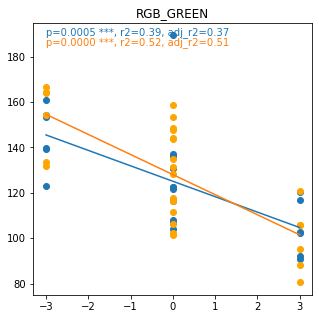

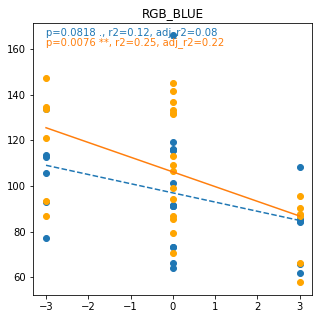

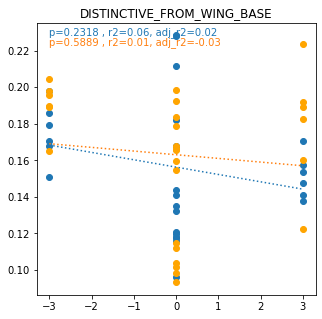

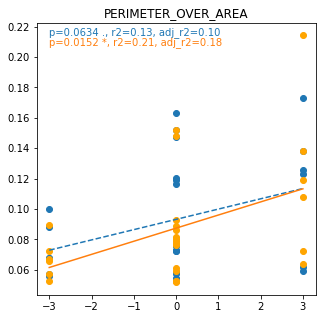

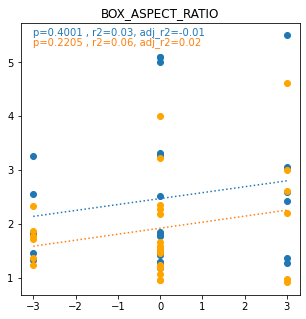

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

# plt.rcParams['figure.figsize'] = [24, 18]
# wing_fig_, wing_axes_ = plt.subplots(27, 3)

rows_ = []
#plt.rcParams['figure.figsize'] = [5, 5]
for target_axis in target_axes:
    for key_id_, key in enumerate(target_measurements_no_proxy_area):

        block_x_shift = int(target_axis[-1]) - 1
        
        #axis_ = canvas_pcgroups_lm[block_x_shift][1][int(key_id_//4)][int(key_id_%4)]
        plt.figure(figsize=[5,5])
        axis_ = plt.gca()
        
        
        lm = LinearRegression()
        X = fw_chars[[target_axis]]
        y = fw_chars[key]
        lm.fit(X, y)
        r_squared = lm.score(X, y)
        adj_r_squared = r_squared - (1 - r_squared) * (X.shape[1] / (X.shape[0] - X.shape[1] - 1))
        Fstat, p = f_regression(X, y)
        sig = ''
        linestyle = 'dotted'
        if p[0] < 1e-3:
            sig = '***'
            linestyle = 'solid'
        elif p[0] < 1e-2:
            sig = '**'
            linestyle = 'solid'
        elif p[0] < 5e-2:
            sig = '*'
            linestyle = 'solid'
        elif p[0] < 1e-1:
            sig = '.'
            linestyle = 'dashed'
            
        axis_.scatter(X, y)
        # axis_.set_ylabel(key.upper())
        # axis_.set_xlabel(target_axis.upper())
        # axis_.set_title(f'p={p[0]:.04f} {sig}, r2={r_squared:.02f}, adj_r2={adj_r_squared:0.2f}')
        axis_.text(x=-3, y=np.max([fw_chars[key], hw_chars[key]]), s=f'p={p[0]:.04f} {sig}, r2={r_squared:.02f}, adj_r2={adj_r_squared:0.2f}', color='tab:blue')
        axis_.plot([-3, 3], [-3 * lm.coef_[0] + lm.intercept_, 3 * lm.coef_[0] + lm.intercept_], color='tab:blue', linestyle=linestyle)

        ##############################
        
        lm = LinearRegression()
        X = hw_chars[[target_axis]]
        y = hw_chars[key]
        lm.fit(X, y)
        r_squared = lm.score(X, y)
        adj_r_squared = r_squared - (1 - r_squared) * (X.shape[1] / (X.shape[0] - X.shape[1] - 1))
        Fstat, p = f_regression(X, y)
        sig = ''
        linestyle = 'dotted'
        if p[0] < 1e-3:
            sig = '***'
            linestyle = 'solid'
        elif p[0] < 1e-2:
            sig = '**'
            linestyle = 'solid'
        elif p[0] < 5e-2:
            sig = '*'
            linestyle = 'solid'
        elif p[0] < 1e-1:
            sig = '.'
            linestyle = 'dashed'
            
        axis_.scatter(X, y, c='orange')
        # axis_.set_ylabel(key.upper())
        # axis_.set_xlabel(target_axis.upper())
        # axis_.set_title(f'p={p[0]:.04f} {sig}, r2={r_squared:.02f}, adj_r2={adj_r_squared:0.2f}')
        axis_.set_title(key.upper())
        txt_y_shift = (np.max([fw_chars[key], hw_chars[key]]) - np.min([fw_chars[key], hw_chars[key]])) / 25
        axis_.text(x=-3, y=np.max([fw_chars[key], hw_chars[key]]) - txt_y_shift, s=f'p={p[0]:.04f} {sig}, r2={r_squared:.02f}, adj_r2={adj_r_squared:0.2f}', color='tab:orange')
        axis_.plot([-3, 3], [-3 * lm.coef_[0] + lm.intercept_, 3 * lm.coef_[0] + lm.intercept_], color='tab:orange', linestyle=linestyle)
        
        plt.savefig(f'./supplementary_materials/aw/aw_LM-{target_axis}-{key_id_}.pdf')
        
    ######################

    # canvas_pcgroups_lm[block_x_shift][0].suptitle(target_axis.upper(), size=24)
    # canvas_pcgroups_lm[block_x_shift][0].tight_layout()
    # canvas_pcgroups_lm[block_x_shift][0].savefig(f'./supplementary_materials/aw/aw_LM-{target_axis}.pdf')